## This chapter covers probability distributions and implementation using PyTorch, as well as how to interpret the results of a test

There are different types of probability distribution,

    - normal distribution
    - binomial distribution
    - multinomial distribution
    - Bernoulli distribution
    
**Note:** Choosing the right loss
function increases the chances of model convergence.

In this recipe, we use 

- another tensor as the update variable, 
- introduce the tensors to the sample mode
- compute the error or loss. 
- compute the rate of change in the loss function to measure the choice of loss function in model convergence

In [36]:
import torch

In [37]:
torch.__version__

'1.1.0'

In [38]:
torch.tensor

<function _VariableFunctions.tensor>

### Data

In [39]:
#height of people
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]) 
# weight of people
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

In [40]:
#height of people
#t_c = torch.tensor([58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0])

In [41]:
#weight of people
#t_u = torch.tensor([115.0, 117.0, 120.0, 123.0, 126.0, 129.0, 132.0, 135.0, 139.0, 142.0, 146.0, 150.0, 154.0, 159.0,164.0])

### Define the model

In [42]:
# this give me the tensor predicted:  t_p
def model(t_u, w, b):
    # w: weight tensor
    # b: constant tensor
    return w * t_u + b

### Define the Loss function

In [43]:
def loss_fn(t_p, t_c):
    # t_p : tensor predicted
    # t_c : pre-computed tensor
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [81]:
w = torch.ones(1)
b = torch.zeros(1)

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [82]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8846)

### The initial loss value is too high because of the initial round of weights chosen. 

The error in the first round of iteration is backpropagated to reduce the errors in the second round, for which
the initial set of weights needs to be updated. 

Therefore, the rate of change in the loss function is essential in **updating the weights** in the estimation process.

This is how a simple mean square loss function works in a two-dimensional
tensor example, with a tensor size of 10,5.

There are two parameters to update the rate of loss function: the
learning rate at the current iteration and the learning rate at the previous
iteration. If the delta between the two iterations exceeds a certain
threshold, then the weight tensor needs to be updated, else model
convergence could happen.

In [83]:
delta = 0.1
learning_rate = 1e-2

# updating the w weights
x = loss_fn(model(t_u, w + delta, b), t_c)
y = loss_fn(model(t_u, w - delta, b), t_c)
loss_rate_of_change_w = (x - y) / (2.0 * delta)
w = w - learning_rate * loss_rate_of_change_w

# updating the b weights
z = loss_fn(model(t_u, w, b + delta), t_c)
k = loss_fn(model(t_u, w, b - delta), t_c)
loss_rate_of_change_b = (z - k) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b

In [85]:
print(w)
print(b)

tensor([-44.1730])
tensor([46.0250])


## The MSELoss function

In [86]:
from torch import nn
loss = nn.MSELoss()
input = torch.randn(10, 5, requires_grad=True)
target = torch.randn(10, 5)
output = loss(input, target)
output.backward()                    #  gradients of loss function

In [14]:
output.grad_fn #the gradient calculation that is used for backpropagation

In [15]:
input

tensor([[ 0.5103, -0.5979,  0.0359, -0.5661,  0.7635],
        [ 1.1128,  0.6617,  0.0528,  0.1861, -0.7784],
        [-0.7423,  1.0543,  1.3040, -0.4766, -0.2963],
        [-0.7511,  2.0046, -0.6379,  0.7609, -0.3809],
        [-0.0009,  0.3218,  0.2809,  0.9683,  1.1862],
        [ 1.0756,  0.0347, -0.1504,  0.5857,  0.9803],
        [-1.4393, -0.4778,  0.0100, -0.0444,  0.8856],
        [-1.1652,  0.2606, -0.4814,  1.4489,  0.4280],
        [-0.1534,  0.9677,  1.2794, -0.7176, -1.3080],
        [ 1.2818,  0.5646, -0.3036,  1.0846,  1.3343]], requires_grad=True)

In [16]:
target

tensor([[-1.8336, -0.0424, -0.3537,  0.1868, -1.3231],
        [-0.4137,  0.3633, -0.8704,  0.3770, -0.2541],
        [-0.8207, -0.7616, -1.2435, -1.7815, -0.7177],
        [-1.1244,  0.8951,  1.0614, -0.4871, -1.2239],
        [-0.2212, -0.1701,  0.5397,  0.6049,  0.4620],
        [-1.6361,  0.0050,  0.3919, -2.3945,  0.2911],
        [-1.8374, -1.4995,  0.1407, -1.4188,  0.8963],
        [ 0.6412, -2.0537,  0.5546,  0.7861, -0.4546],
        [ 1.2559, -1.9034,  0.2259, -0.4556, -0.6118],
        [ 1.9875, -0.5051,  1.3577, -0.8252, -0.2449]])

### Estimating the Derivative of the Loss Function
The last line of the previous script shows the *grad_fn* as an object embedded in the output
object tensor. In this recipe, we explain how this is computed. 

*grad_fn* **is a derivative of the loss function with respect to the parameters of the model.**

This is exactly what we do in the following grad_fn.

In [88]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c)            # we change the loss function to two times
                                           #the differences between the input and the output tensors
    return dsq_diffs

# Model
def model(t_u, w, b):
    return w * t_u + b

# partial derivative of the model related with w
def dmodel_dw(t_u, w, b):                   
    return t_u

# partial derivative of the model related with b
def dmodel_db(t_u, w, b):                 
    return 1.0

# Gradient function
def grad_fn(t_u, t_c, t_p, w, b):        
    dloss_dw = dloss_fn(t_p, t_c) * dmodel_dw(t_u, w, b)
    dloss_db = dloss_fn(t_p, t_c) * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.mean(), dloss_db.mean()])

**Epoch** is an iteration that produces a loss value from the loss function defined earlier. 

The **params vector** is about coefficients and constants that need to be changed to
minimize the loss function. 

The **grad function** computes the feedback
value to the next epoch. This is just an example. The number of epochs
chosen is an iterative task depending on the input data, output data, and
choice of loss and optimization functions.

If we **reduce the learning rate**, we are able to pass relevant values to the
gradient, the parameter updates in a better way, and **model convergence
becomes quicker.**

In [91]:
params = torch.tensor([1.0, 0.0])
nepochs = 10
learning_rate = 0.005

for epoch in range(nepochs):
    # forward pass
    w, b = params
    t_p = model(t_u, w, b)    # t_p : tensor predicted

    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    # backward pass
    grad = grad_fn(t_u, t_c, t_p, w, b)

    print('Params:', params)
    print('Grad:', grad)
    
    params = params - learning_rate * grad
    
params

Epoch 0, Loss 1763.884644
Params: tensor([1., 0.])
Grad: tensor([4517.2964,   82.6000])
Epoch 1, Loss 5802484.500000
Params: tensor([-44.1730,  -0.8260])
Grad: tensor([-261257.4062,   -4598.9707])
Epoch 2, Loss 19408031744.000000
Params: tensor([2568.4011,   45.1637])
Grad: tensor([15109615.0000,   266155.7188])
Epoch 3, Loss 64915909902336.000000
Params: tensor([-148527.7344,   -2616.3933])
Grad: tensor([-8.7385e+08, -1.5393e+07])
Epoch 4, Loss 217130439561707520.000000
Params: tensor([8589997.0000,  151310.8750])
Grad: tensor([5.0539e+10, 8.9023e+08])
Epoch 5, Loss 726257020202974707712.000000
Params: tensor([-4.9680e+08, -8.7510e+06])
Grad: tensor([-2.9229e+12, -5.1486e+10])
Epoch 6, Loss 2429181687085405986357248.000000
Params: tensor([2.8732e+10, 5.0610e+08])
Grad: tensor([1.6904e+14, 2.9776e+12])
Epoch 7, Loss 8125117236949438203699396608.000000
Params: tensor([-1.6617e+12, -2.9270e+10])
Grad: tensor([-9.7764e+15, -1.7221e+14])
Epoch 8, Loss 27176865195881116022129584766976.00000

tensor([3.2144e+17, 5.6621e+15])

In [92]:
params = torch.tensor([1.0, 0.0])

nepochs = 10

learning_rate = 0.1

for epoch in range(nepochs):
    # forward pass
    w, b = params
    t_p = model(t_u, w, b)

    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    # backward pass
    grad = grad_fn(t_u, t_c, t_p, w, b)

    print('Params:', params)
    print('Grad:', grad)
    
    params = params - learning_rate * grad
    
params

Epoch 0, Loss 1763.884644
Params: tensor([1., 0.])
Grad: tensor([4517.2964,   82.6000])
Epoch 1, Loss 323.090546
Params: tensor([ 0.5483, -0.0083])
Grad: tensor([1859.5493,   35.7843])
Epoch 2, Loss 78.929634
Params: tensor([ 0.3623, -0.0118])
Grad: tensor([765.4666,  16.5122])
Epoch 3, Loss 37.552845
Params: tensor([ 0.2858, -0.0135])
Grad: tensor([315.0790,   8.5787])
Epoch 4, Loss 30.540285
Params: tensor([ 0.2543, -0.0143])
Grad: tensor([129.6733,   5.3127])
Epoch 5, Loss 29.351152
Params: tensor([ 0.2413, -0.0149])
Grad: tensor([53.3496,  3.9682])
Epoch 6, Loss 29.148882
Params: tensor([ 0.2360, -0.0153])
Grad: tensor([21.9304,  3.4148])
Epoch 7, Loss 29.113848
Params: tensor([ 0.2338, -0.0156])
Grad: tensor([8.9964, 3.1869])
Epoch 8, Loss 29.107145
Params: tensor([ 0.2329, -0.0159])
Grad: tensor([3.6721, 3.0930])
Epoch 9, Loss 29.105242
Params: tensor([ 0.2325, -0.0162])
Grad: tensor([1.4803, 3.0544])


tensor([ 0.2324, -0.0166])

If we reduce the learning rate a bit, then the process of weight updating
will be a little slower, which means that the epoch number needs to be
increased in order to find a stable state for the model.

In [105]:
t_un = 0.1 * t_u

In [106]:
params = torch.tensor([1.0, 0.0])

nepochs = 10

learning_rate = 0.05

for epoch in range(nepochs):
    # forward pass
    w, b = params
    t_p = model(t_un, w, b)

    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    # backward pass
    grad = grad_fn(t_un, t_c, t_p, w, b)

    print('Params:', params)
    print('Grad:', grad)
    
    params = params - learning_rate * grad
    
params

Epoch 0, Loss 80.364342
Params: tensor([1., 0.])
Grad: tensor([-77.6140, -10.6400])
Epoch 1, Loss 238.058212
Params: tensor([4.8807, 0.5320])
Grad: tensor([156.1447,  30.6281])
Epoch 2, Loss 890.808044
Params: tensor([-2.9265, -0.9994])
Grad: tensor([-318.9108,  -53.3177])
Epoch 3, Loss 3588.245361
Params: tensor([13.0190,  1.6665])
Grad: tensor([646.5601, 117.2099])
Epoch 4, Loss 14730.752930
Params: tensor([-19.3090,  -4.1940])
Grad: tensor([-1315.5576,  -229.4293])
Epoch 5, Loss 60753.609375
Params: tensor([46.4689,  7.2775])
Grad: tensor([2672.0769,  474.9726])
Epoch 6, Loss 250841.406250
Params: tensor([-87.1350, -16.4712])
Grad: tensor([-5431.9985,  -956.6605])
Epoch 7, Loss 1035955.187500
Params: tensor([184.4650,  31.3619])
Grad: tensor([11037.9648,  1952.7809])
Epoch 8, Loss 4278682.000000
Params: tensor([-367.4333,  -66.2772])
Grad: tensor([-22434.0059,  -3960.1633])
Epoch 9, Loss 17671998.000000
Params: tensor([754.2670, 131.7310])
Grad: tensor([45591.2461,  8056.6689])


tensor([-1525.2952,  -271.1025])

At epoch 5000, the loss value is 2.92, which is not going down further;
hence, at this iteration level, the tensor output displays 5.36 as the final
weight and –17.30 as the final bias. These are the final parameters from
the model.

In [107]:
params = torch.tensor([1.0, 0.0])

nepochs = 50

learning_rate = 1e-2

for epoch in range(nepochs):
    # forward pass
    w, b = params
    t_p = model(t_un, w, b)

    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    # backward pass
    grad = grad_fn(t_un, t_c, t_p, w, b)

    params = params - learning_rate * grad
    
params

Epoch 0, Loss 80.364342
Epoch 1, Loss 37.574917
Epoch 2, Loss 30.871077
Epoch 3, Loss 29.756193
Epoch 4, Loss 29.507149
Epoch 5, Loss 29.392458
Epoch 6, Loss 29.298828
Epoch 7, Loss 29.208717
Epoch 8, Loss 29.119417
Epoch 9, Loss 29.030487
Epoch 10, Loss 28.941875
Epoch 11, Loss 28.853565
Epoch 12, Loss 28.765556
Epoch 13, Loss 28.677851
Epoch 14, Loss 28.590431
Epoch 15, Loss 28.503321
Epoch 16, Loss 28.416496
Epoch 17, Loss 28.329975
Epoch 18, Loss 28.243738
Epoch 19, Loss 28.157801
Epoch 20, Loss 28.072151
Epoch 21, Loss 27.986799
Epoch 22, Loss 27.901731
Epoch 23, Loss 27.816956
Epoch 24, Loss 27.732466
Epoch 25, Loss 27.648256
Epoch 26, Loss 27.564342
Epoch 27, Loss 27.480711
Epoch 28, Loss 27.397358
Epoch 29, Loss 27.314295
Epoch 30, Loss 27.231512
Epoch 31, Loss 27.149006
Epoch 32, Loss 27.066790
Epoch 33, Loss 26.984844
Epoch 34, Loss 26.903173
Epoch 35, Loss 26.821791
Epoch 36, Loss 26.740675
Epoch 37, Loss 26.659838
Epoch 38, Loss 26.579279
Epoch 39, Loss 26.498987
Epoch 40, 

tensor([ 2.5235, -1.2040])

**To fine-tune this model** in estimating parameters, we can redefine the
model and the loss function and apply it to the same example.

After completing the training process, we
should **reset the grad function to None**.

In [93]:
def model(t_u, w, b):
    return w * t_u + b

In [94]:
def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

In [95]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

##loss_fn(t_p, t_c):
tp_s = model(t_u, *params)
loss = loss_fn(tp_s, t_c)

In [96]:
params.grad is None

True

## Fine-Tuning a Model Problem

How do we find the **gradients of the loss function** by applying an
optimization function to optimize the loss function?

We’ll use the **backward() function**.

 - The backward() function calculates the gradients of a function with respect to its parameters

In [97]:
loss.backward()

In [98]:
params.grad

tensor([4517.2969,   82.6000])

**It is important to reset the parameter grid to avoid the error values accumulated from any other session**

In [99]:
if params.grad is not None:
    params.grad.zero_()

In [109]:
# Model
def model(t_u, w, b):
    return w * t_u + b

# Loss Function
def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

# Defining the parameters
t_un = 0.1 * t_u
params = torch.tensor([1.0, 0.0], requires_grad=True)
nepochs = 5000
learning_rate = 1e-2

In [110]:
for epoch in range(nepochs):
    # forward pass
    t_p = model(t_un, *params)
    loss = loss_fn(t_p, t_c)

    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    # backward pass
    if params.grad is not None:
        params.grad.zero_()   # at each epoch is necessary zero the grads to avoid errors accumulated

    loss.backward()      

    #params.grad.clamp_(-1.0, 1.0)
    #print(params, params.grad)

    params = (params - learning_rate * params.grad).detach().requires_grad_() # updating the weights "w" and "b"

params
# The final model parameters are 5.3671 with a bias of –17.3012.

Epoch 0, Loss 80.364342
Epoch 1, Loss 37.574917
Epoch 2, Loss 30.871077
Epoch 3, Loss 29.756193
Epoch 4, Loss 29.507149
Epoch 5, Loss 29.392458
Epoch 6, Loss 29.298828
Epoch 7, Loss 29.208717
Epoch 8, Loss 29.119417
Epoch 9, Loss 29.030487
Epoch 10, Loss 28.941875
Epoch 11, Loss 28.853565
Epoch 12, Loss 28.765556
Epoch 13, Loss 28.677851
Epoch 14, Loss 28.590431
Epoch 15, Loss 28.503321
Epoch 16, Loss 28.416496
Epoch 17, Loss 28.329973
Epoch 18, Loss 28.243738
Epoch 19, Loss 28.157801
Epoch 20, Loss 28.072151
Epoch 21, Loss 27.986799
Epoch 22, Loss 27.901731
Epoch 23, Loss 27.816954
Epoch 24, Loss 27.732460
Epoch 25, Loss 27.648256
Epoch 26, Loss 27.564342
Epoch 27, Loss 27.480711
Epoch 28, Loss 27.397358
Epoch 29, Loss 27.314293
Epoch 30, Loss 27.231512
Epoch 31, Loss 27.149006
Epoch 32, Loss 27.066790
Epoch 33, Loss 26.984844
Epoch 34, Loss 26.903173
Epoch 35, Loss 26.821791
Epoch 36, Loss 26.740675
Epoch 37, Loss 26.659838
Epoch 38, Loss 26.579279
Epoch 39, Loss 26.498987
Epoch 40, 

Epoch 373, Loss 10.498408
Epoch 374, Loss 10.472707
Epoch 375, Loss 10.447094
Epoch 376, Loss 10.421568
Epoch 377, Loss 10.396132
Epoch 378, Loss 10.370778
Epoch 379, Loss 10.345510
Epoch 380, Loss 10.320329
Epoch 381, Loss 10.295236
Epoch 382, Loss 10.270224
Epoch 383, Loss 10.245296
Epoch 384, Loss 10.220456
Epoch 385, Loss 10.195701
Epoch 386, Loss 10.171027
Epoch 387, Loss 10.146436
Epoch 388, Loss 10.121934
Epoch 389, Loss 10.097512
Epoch 390, Loss 10.073174
Epoch 391, Loss 10.048919
Epoch 392, Loss 10.024742
Epoch 393, Loss 10.000652
Epoch 394, Loss 9.976640
Epoch 395, Loss 9.952712
Epoch 396, Loss 9.928863
Epoch 397, Loss 9.905092
Epoch 398, Loss 9.881409
Epoch 399, Loss 9.857802
Epoch 400, Loss 9.834277
Epoch 401, Loss 9.810832
Epoch 402, Loss 9.787466
Epoch 403, Loss 9.764176
Epoch 404, Loss 9.740971
Epoch 405, Loss 9.717843
Epoch 406, Loss 9.694793
Epoch 407, Loss 9.671823
Epoch 408, Loss 9.648926
Epoch 409, Loss 9.626110
Epoch 410, Loss 9.603373
Epoch 411, Loss 9.580710
Epoc

Epoch 722, Loss 5.238335
Epoch 723, Loss 5.230491
Epoch 724, Loss 5.222673
Epoch 725, Loss 5.214881
Epoch 726, Loss 5.207120
Epoch 727, Loss 5.199381
Epoch 728, Loss 5.191670
Epoch 729, Loss 5.183984
Epoch 730, Loss 5.176324
Epoch 731, Loss 5.168688
Epoch 732, Loss 5.161084
Epoch 733, Loss 5.153500
Epoch 734, Loss 5.145943
Epoch 735, Loss 5.138412
Epoch 736, Loss 5.130910
Epoch 737, Loss 5.123428
Epoch 738, Loss 5.115977
Epoch 739, Loss 5.108547
Epoch 740, Loss 5.101144
Epoch 741, Loss 5.093765
Epoch 742, Loss 5.086413
Epoch 743, Loss 5.079085
Epoch 744, Loss 5.071782
Epoch 745, Loss 5.064505
Epoch 746, Loss 5.057247
Epoch 747, Loss 5.050022
Epoch 748, Loss 5.042817
Epoch 749, Loss 5.035636
Epoch 750, Loss 5.028476
Epoch 751, Loss 5.021346
Epoch 752, Loss 5.014239
Epoch 753, Loss 5.007157
Epoch 754, Loss 5.000099
Epoch 755, Loss 4.993064
Epoch 756, Loss 4.986051
Epoch 757, Loss 4.979065
Epoch 758, Loss 4.972100
Epoch 759, Loss 4.965159
Epoch 760, Loss 4.958245
Epoch 761, Loss 4.951350


Epoch 1119, Loss 3.526694
Epoch 1120, Loss 3.524662
Epoch 1121, Loss 3.522633
Epoch 1122, Loss 3.520614
Epoch 1123, Loss 3.518601
Epoch 1124, Loss 3.516594
Epoch 1125, Loss 3.514594
Epoch 1126, Loss 3.512602
Epoch 1127, Loss 3.510619
Epoch 1128, Loss 3.508637
Epoch 1129, Loss 3.506665
Epoch 1130, Loss 3.504700
Epoch 1131, Loss 3.502740
Epoch 1132, Loss 3.500789
Epoch 1133, Loss 3.498843
Epoch 1134, Loss 3.496905
Epoch 1135, Loss 3.494972
Epoch 1136, Loss 3.493046
Epoch 1137, Loss 3.491127
Epoch 1138, Loss 3.489213
Epoch 1139, Loss 3.487308
Epoch 1140, Loss 3.485410
Epoch 1141, Loss 3.483515
Epoch 1142, Loss 3.481627
Epoch 1143, Loss 3.479746
Epoch 1144, Loss 3.477872
Epoch 1145, Loss 3.476005
Epoch 1146, Loss 3.474143
Epoch 1147, Loss 3.472288
Epoch 1148, Loss 3.470441
Epoch 1149, Loss 3.468597
Epoch 1150, Loss 3.466762
Epoch 1151, Loss 3.464930
Epoch 1152, Loss 3.463105
Epoch 1153, Loss 3.461289
Epoch 1154, Loss 3.459477
Epoch 1155, Loss 3.457672
Epoch 1156, Loss 3.455873
Epoch 1157, 

Epoch 1507, Loss 3.087775
Epoch 1508, Loss 3.087232
Epoch 1509, Loss 3.086690
Epoch 1510, Loss 3.086150
Epoch 1511, Loss 3.085612
Epoch 1512, Loss 3.085075
Epoch 1513, Loss 3.084542
Epoch 1514, Loss 3.084009
Epoch 1515, Loss 3.083478
Epoch 1516, Loss 3.082948
Epoch 1517, Loss 3.082422
Epoch 1518, Loss 3.081897
Epoch 1519, Loss 3.081373
Epoch 1520, Loss 3.080850
Epoch 1521, Loss 3.080331
Epoch 1522, Loss 3.079811
Epoch 1523, Loss 3.079297
Epoch 1524, Loss 3.078781
Epoch 1525, Loss 3.078268
Epoch 1526, Loss 3.077757
Epoch 1527, Loss 3.077247
Epoch 1528, Loss 3.076739
Epoch 1529, Loss 3.076232
Epoch 1530, Loss 3.075729
Epoch 1531, Loss 3.075225
Epoch 1532, Loss 3.074724
Epoch 1533, Loss 3.074227
Epoch 1534, Loss 3.073726
Epoch 1535, Loss 3.073232
Epoch 1536, Loss 3.072739
Epoch 1537, Loss 3.072245
Epoch 1538, Loss 3.071753
Epoch 1539, Loss 3.071265
Epoch 1540, Loss 3.070778
Epoch 1541, Loss 3.070293
Epoch 1542, Loss 3.069808
Epoch 1543, Loss 3.069326
Epoch 1544, Loss 3.068845
Epoch 1545, 

Epoch 1895, Loss 2.970449
Epoch 1896, Loss 2.970304
Epoch 1897, Loss 2.970159
Epoch 1898, Loss 2.970015
Epoch 1899, Loss 2.969871
Epoch 1900, Loss 2.969727
Epoch 1901, Loss 2.969586
Epoch 1902, Loss 2.969443
Epoch 1903, Loss 2.969302
Epoch 1904, Loss 2.969160
Epoch 1905, Loss 2.969017
Epoch 1906, Loss 2.968879
Epoch 1907, Loss 2.968739
Epoch 1908, Loss 2.968599
Epoch 1909, Loss 2.968460
Epoch 1910, Loss 2.968322
Epoch 1911, Loss 2.968184
Epoch 1912, Loss 2.968046
Epoch 1913, Loss 2.967908
Epoch 1914, Loss 2.967772
Epoch 1915, Loss 2.967636
Epoch 1916, Loss 2.967499
Epoch 1917, Loss 2.967365
Epoch 1918, Loss 2.967230
Epoch 1919, Loss 2.967095
Epoch 1920, Loss 2.966961
Epoch 1921, Loss 2.966827
Epoch 1922, Loss 2.966693
Epoch 1923, Loss 2.966561
Epoch 1924, Loss 2.966429
Epoch 1925, Loss 2.966297
Epoch 1926, Loss 2.966167
Epoch 1927, Loss 2.966036
Epoch 1928, Loss 2.965904
Epoch 1929, Loss 2.965776
Epoch 1930, Loss 2.965646
Epoch 1931, Loss 2.965517
Epoch 1932, Loss 2.965387
Epoch 1933, 

Epoch 2351, Loss 2.936725
Epoch 2352, Loss 2.936694
Epoch 2353, Loss 2.936665
Epoch 2354, Loss 2.936633
Epoch 2355, Loss 2.936602
Epoch 2356, Loss 2.936572
Epoch 2357, Loss 2.936542
Epoch 2358, Loss 2.936511
Epoch 2359, Loss 2.936482
Epoch 2360, Loss 2.936451
Epoch 2361, Loss 2.936421
Epoch 2362, Loss 2.936392
Epoch 2363, Loss 2.936362
Epoch 2364, Loss 2.936332
Epoch 2365, Loss 2.936304
Epoch 2366, Loss 2.936274
Epoch 2367, Loss 2.936244
Epoch 2368, Loss 2.936215
Epoch 2369, Loss 2.936188
Epoch 2370, Loss 2.936156
Epoch 2371, Loss 2.936128
Epoch 2372, Loss 2.936100
Epoch 2373, Loss 2.936071
Epoch 2374, Loss 2.936043
Epoch 2375, Loss 2.936014
Epoch 2376, Loss 2.935986
Epoch 2377, Loss 2.935957
Epoch 2378, Loss 2.935928
Epoch 2379, Loss 2.935901
Epoch 2380, Loss 2.935873
Epoch 2381, Loss 2.935845
Epoch 2382, Loss 2.935817
Epoch 2383, Loss 2.935789
Epoch 2384, Loss 2.935761
Epoch 2385, Loss 2.935734
Epoch 2386, Loss 2.935707
Epoch 2387, Loss 2.935679
Epoch 2388, Loss 2.935650
Epoch 2389, 

Epoch 2727, Loss 2.930173
Epoch 2728, Loss 2.930167
Epoch 2729, Loss 2.930156
Epoch 2730, Loss 2.930149
Epoch 2731, Loss 2.930139
Epoch 2732, Loss 2.930131
Epoch 2733, Loss 2.930123
Epoch 2734, Loss 2.930113
Epoch 2735, Loss 2.930107
Epoch 2736, Loss 2.930099
Epoch 2737, Loss 2.930090
Epoch 2738, Loss 2.930081
Epoch 2739, Loss 2.930073
Epoch 2740, Loss 2.930064
Epoch 2741, Loss 2.930056
Epoch 2742, Loss 2.930048
Epoch 2743, Loss 2.930041
Epoch 2744, Loss 2.930032
Epoch 2745, Loss 2.930022
Epoch 2746, Loss 2.930016
Epoch 2747, Loss 2.930008
Epoch 2748, Loss 2.930000
Epoch 2749, Loss 2.929992
Epoch 2750, Loss 2.929983
Epoch 2751, Loss 2.929975
Epoch 2752, Loss 2.929968
Epoch 2753, Loss 2.929960
Epoch 2754, Loss 2.929953
Epoch 2755, Loss 2.929945
Epoch 2756, Loss 2.929937
Epoch 2757, Loss 2.929929
Epoch 2758, Loss 2.929921
Epoch 2759, Loss 2.929914
Epoch 2760, Loss 2.929905
Epoch 2761, Loss 2.929896
Epoch 2762, Loss 2.929891
Epoch 2763, Loss 2.929882
Epoch 2764, Loss 2.929874
Epoch 2765, 

Epoch 3138, Loss 2.928272
Epoch 3139, Loss 2.928268
Epoch 3140, Loss 2.928267
Epoch 3141, Loss 2.928265
Epoch 3142, Loss 2.928263
Epoch 3143, Loss 2.928260
Epoch 3144, Loss 2.928259
Epoch 3145, Loss 2.928256
Epoch 3146, Loss 2.928255
Epoch 3147, Loss 2.928252
Epoch 3148, Loss 2.928251
Epoch 3149, Loss 2.928248
Epoch 3150, Loss 2.928246
Epoch 3151, Loss 2.928245
Epoch 3152, Loss 2.928242
Epoch 3153, Loss 2.928240
Epoch 3154, Loss 2.928236
Epoch 3155, Loss 2.928236
Epoch 3156, Loss 2.928233
Epoch 3157, Loss 2.928231
Epoch 3158, Loss 2.928230
Epoch 3159, Loss 2.928227
Epoch 3160, Loss 2.928226
Epoch 3161, Loss 2.928225
Epoch 3162, Loss 2.928223
Epoch 3163, Loss 2.928219
Epoch 3164, Loss 2.928218
Epoch 3165, Loss 2.928216
Epoch 3166, Loss 2.928215
Epoch 3167, Loss 2.928212
Epoch 3168, Loss 2.928211
Epoch 3169, Loss 2.928210
Epoch 3170, Loss 2.928206
Epoch 3171, Loss 2.928205
Epoch 3172, Loss 2.928204
Epoch 3173, Loss 2.928202
Epoch 3174, Loss 2.928200
Epoch 3175, Loss 2.928196
Epoch 3176, 

Epoch 3584, Loss 2.927783
Epoch 3585, Loss 2.927783
Epoch 3586, Loss 2.927781
Epoch 3587, Loss 2.927782
Epoch 3588, Loss 2.927780
Epoch 3589, Loss 2.927781
Epoch 3590, Loss 2.927781
Epoch 3591, Loss 2.927780
Epoch 3592, Loss 2.927780
Epoch 3593, Loss 2.927778
Epoch 3594, Loss 2.927779
Epoch 3595, Loss 2.927778
Epoch 3596, Loss 2.927778
Epoch 3597, Loss 2.927778
Epoch 3598, Loss 2.927777
Epoch 3599, Loss 2.927776
Epoch 3600, Loss 2.927775
Epoch 3601, Loss 2.927775
Epoch 3602, Loss 2.927773
Epoch 3603, Loss 2.927775
Epoch 3604, Loss 2.927775
Epoch 3605, Loss 2.927774
Epoch 3606, Loss 2.927773
Epoch 3607, Loss 2.927773
Epoch 3608, Loss 2.927772
Epoch 3609, Loss 2.927772
Epoch 3610, Loss 2.927772
Epoch 3611, Loss 2.927770
Epoch 3612, Loss 2.927772
Epoch 3613, Loss 2.927772
Epoch 3614, Loss 2.927770
Epoch 3615, Loss 2.927770
Epoch 3616, Loss 2.927769
Epoch 3617, Loss 2.927768
Epoch 3618, Loss 2.927769
Epoch 3619, Loss 2.927768
Epoch 3620, Loss 2.927766
Epoch 3621, Loss 2.927767
Epoch 3622, 

Epoch 3970, Loss 2.927682
Epoch 3971, Loss 2.927684
Epoch 3972, Loss 2.927683
Epoch 3973, Loss 2.927684
Epoch 3974, Loss 2.927683
Epoch 3975, Loss 2.927682
Epoch 3976, Loss 2.927682
Epoch 3977, Loss 2.927682
Epoch 3978, Loss 2.927682
Epoch 3979, Loss 2.927681
Epoch 3980, Loss 2.927682
Epoch 3981, Loss 2.927681
Epoch 3982, Loss 2.927681
Epoch 3983, Loss 2.927682
Epoch 3984, Loss 2.927681
Epoch 3985, Loss 2.927681
Epoch 3986, Loss 2.927681
Epoch 3987, Loss 2.927680
Epoch 3988, Loss 2.927681
Epoch 3989, Loss 2.927681
Epoch 3990, Loss 2.927680
Epoch 3991, Loss 2.927682
Epoch 3992, Loss 2.927681
Epoch 3993, Loss 2.927680
Epoch 3994, Loss 2.927679
Epoch 3995, Loss 2.927680
Epoch 3996, Loss 2.927679
Epoch 3997, Loss 2.927680
Epoch 3998, Loss 2.927680
Epoch 3999, Loss 2.927679
Epoch 4000, Loss 2.927679
Epoch 4001, Loss 2.927679
Epoch 4002, Loss 2.927679
Epoch 4003, Loss 2.927679
Epoch 4004, Loss 2.927680
Epoch 4005, Loss 2.927681
Epoch 4006, Loss 2.927679
Epoch 4007, Loss 2.927679
Epoch 4008, 

Epoch 4431, Loss 2.927653
Epoch 4432, Loss 2.927654
Epoch 4433, Loss 2.927654
Epoch 4434, Loss 2.927654
Epoch 4435, Loss 2.927655
Epoch 4436, Loss 2.927653
Epoch 4437, Loss 2.927652
Epoch 4438, Loss 2.927653
Epoch 4439, Loss 2.927654
Epoch 4440, Loss 2.927655
Epoch 4441, Loss 2.927655
Epoch 4442, Loss 2.927652
Epoch 4443, Loss 2.927653
Epoch 4444, Loss 2.927651
Epoch 4445, Loss 2.927654
Epoch 4446, Loss 2.927654
Epoch 4447, Loss 2.927653
Epoch 4448, Loss 2.927654
Epoch 4449, Loss 2.927655
Epoch 4450, Loss 2.927654
Epoch 4451, Loss 2.927654
Epoch 4452, Loss 2.927653
Epoch 4453, Loss 2.927652
Epoch 4454, Loss 2.927653
Epoch 4455, Loss 2.927653
Epoch 4456, Loss 2.927654
Epoch 4457, Loss 2.927653
Epoch 4458, Loss 2.927652
Epoch 4459, Loss 2.927653
Epoch 4460, Loss 2.927652
Epoch 4461, Loss 2.927654
Epoch 4462, Loss 2.927654
Epoch 4463, Loss 2.927654
Epoch 4464, Loss 2.927653
Epoch 4465, Loss 2.927653
Epoch 4466, Loss 2.927652
Epoch 4467, Loss 2.927654
Epoch 4468, Loss 2.927653
Epoch 4469, 

Epoch 4823, Loss 2.927648
Epoch 4824, Loss 2.927648
Epoch 4825, Loss 2.927649
Epoch 4826, Loss 2.927648
Epoch 4827, Loss 2.927649
Epoch 4828, Loss 2.927649
Epoch 4829, Loss 2.927648
Epoch 4830, Loss 2.927648
Epoch 4831, Loss 2.927646
Epoch 4832, Loss 2.927648
Epoch 4833, Loss 2.927647
Epoch 4834, Loss 2.927648
Epoch 4835, Loss 2.927649
Epoch 4836, Loss 2.927647
Epoch 4837, Loss 2.927648
Epoch 4838, Loss 2.927648
Epoch 4839, Loss 2.927648
Epoch 4840, Loss 2.927648
Epoch 4841, Loss 2.927648
Epoch 4842, Loss 2.927649
Epoch 4843, Loss 2.927647
Epoch 4844, Loss 2.927648
Epoch 4845, Loss 2.927647
Epoch 4846, Loss 2.927647
Epoch 4847, Loss 2.927648
Epoch 4848, Loss 2.927648
Epoch 4849, Loss 2.927649
Epoch 4850, Loss 2.927647
Epoch 4851, Loss 2.927649
Epoch 4852, Loss 2.927648
Epoch 4853, Loss 2.927647
Epoch 4854, Loss 2.927649
Epoch 4855, Loss 2.927648
Epoch 4856, Loss 2.927649
Epoch 4857, Loss 2.927649
Epoch 4858, Loss 2.927647
Epoch 4859, Loss 2.927648
Epoch 4860, Loss 2.927648
Epoch 4861, 

tensor([  5.3671, -17.3012], requires_grad=True)

## Selecting an Optimization Function

How do we optimize the gradients?

Each optimization method is unique in solving a problem.

The **Adam optimizer** is a first-order, gradient-based optimization of stochastic objective functions. This is computationally efficient enough for deployment on large datasets. 

To use torch.optim:

- We have to construct an optimizer object in our code that will hold the current state of the parameters and will update the parameters based on the computed gradients, moments, and learning rate.

- To construct an optimizer, we have to give it an iterable containing the parameters and ensure that all the parameters are variables to optimize.

- Then, we can specify optimizer-specific options, such as the learning rate, weight decay, moments, and so forth.

**Adadelta** is another optimizer that is fast enough to work on large
datasets. This method does not require manual fine-tuning of the learning
rate; the algorithm takes care of it internally.

In [111]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

In [113]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
# Stochastic Gradient Descendent -> https://www.youtube.com/watch?v=vMh0zPT0tLI
optimizer = optim.SGD([params], lr=learning_rate) #  specify optimizer-specific options

t_p = model(t_u, *params)  # t_p : tensor predicted

"""
def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()
"""
loss = loss_fn(t_p, t_c)   # loss function
loss.backward()            # calculate the gradients of the loss function
optimizer.step()           # optimizer step
params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [114]:
params = torch.tensor([1.0, 0.0], requires_grad=True)   # parameters : w and b to pass to the model
learning_rate = 1e-2                                    # learning rate 
optimizer = optim.SGD([params], lr=learning_rate)       # optimizer the gradients

t_p = model(t_un, *params)                              # model : t_p : tensor predicted
loss = loss_fn(t_p, t_c)                                # loss function

optimizer.zero_grad()                                   # reset to zero the gradients

loss.backward()                                         # calculate the gradient of the loss

optimizer.step()                                        # optimizer step

params                                                  # new parameters

tensor([1.7761, 0.1064], requires_grad=True)

Now let’s call the model and loss function out once again and apply
them along with the optimization function

The next example has **two custom functions and a loss function**. We have
taken two small tensor values. 

The new thing is that **we have taken the
optimizer to find the minimum value.**

In [132]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

params = torch.tensor([1.0, 0.0], requires_grad=True)      # initiate the "w" and "b" parameters fo the model
learning_rate = 1e-2                                       # learning rate of the model
optimizer = optim.SGD([params], lr=learning_rate)          # SGD optimizer

nepochs = 5000
t_un = t_u * 0.1

for epoch in range(nepochs):
    
    # forward pass
    t_p = model(t_un, *params)
    loss = loss_fn(t_p, t_c)

    print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
    # backward pass
    optimizer.zero_grad()          # * At each epoch is necessary zero the grads to avoid errors accumulated.
    loss.backward()                # * To calculate the gradients of the loss function.
    optimizer.step()               # * Here we update the parameters. 
                                   # * So we don't need to build a equation to update the parameters, 
                                   # as we did in the last example, because we pass the parameters 
                                   # as an element to optimizer. 

t_p = model(t_un, *params)

params



Epoch 0, Loss 80.364342
Epoch 1, Loss 37.574917
Epoch 2, Loss 30.871077
Epoch 3, Loss 29.756193
Epoch 4, Loss 29.507149
Epoch 5, Loss 29.392458
Epoch 6, Loss 29.298828
Epoch 7, Loss 29.208717
Epoch 8, Loss 29.119417
Epoch 9, Loss 29.030487
Epoch 10, Loss 28.941875
Epoch 11, Loss 28.853565
Epoch 12, Loss 28.765556
Epoch 13, Loss 28.677851
Epoch 14, Loss 28.590431
Epoch 15, Loss 28.503321
Epoch 16, Loss 28.416496
Epoch 17, Loss 28.329973
Epoch 18, Loss 28.243738
Epoch 19, Loss 28.157801
Epoch 20, Loss 28.072151
Epoch 21, Loss 27.986799
Epoch 22, Loss 27.901731
Epoch 23, Loss 27.816954
Epoch 24, Loss 27.732460
Epoch 25, Loss 27.648256
Epoch 26, Loss 27.564342
Epoch 27, Loss 27.480711
Epoch 28, Loss 27.397358
Epoch 29, Loss 27.314293
Epoch 30, Loss 27.231512
Epoch 31, Loss 27.149006
Epoch 32, Loss 27.066790
Epoch 33, Loss 26.984844
Epoch 34, Loss 26.903173
Epoch 35, Loss 26.821791
Epoch 36, Loss 26.740675
Epoch 37, Loss 26.659838
Epoch 38, Loss 26.579279
Epoch 39, Loss 26.498987
Epoch 40, 

Epoch 364, Loss 10.733681
Epoch 365, Loss 10.707183
Epoch 366, Loss 10.680775
Epoch 367, Loss 10.654453
Epoch 368, Loss 10.628225
Epoch 369, Loss 10.602084
Epoch 370, Loss 10.576032
Epoch 371, Loss 10.550071
Epoch 372, Loss 10.524195
Epoch 373, Loss 10.498408
Epoch 374, Loss 10.472707
Epoch 375, Loss 10.447094
Epoch 376, Loss 10.421568
Epoch 377, Loss 10.396132
Epoch 378, Loss 10.370778
Epoch 379, Loss 10.345510
Epoch 380, Loss 10.320329
Epoch 381, Loss 10.295236
Epoch 382, Loss 10.270224
Epoch 383, Loss 10.245296
Epoch 384, Loss 10.220456
Epoch 385, Loss 10.195701
Epoch 386, Loss 10.171027
Epoch 387, Loss 10.146436
Epoch 388, Loss 10.121934
Epoch 389, Loss 10.097512
Epoch 390, Loss 10.073174
Epoch 391, Loss 10.048919
Epoch 392, Loss 10.024742
Epoch 393, Loss 10.000652
Epoch 394, Loss 9.976640
Epoch 395, Loss 9.952712
Epoch 396, Loss 9.928863
Epoch 397, Loss 9.905092
Epoch 398, Loss 9.881409
Epoch 399, Loss 9.857802
Epoch 400, Loss 9.834277
Epoch 401, Loss 9.810832
Epoch 402, Loss 9.78

Epoch 759, Loss 4.965159
Epoch 760, Loss 4.958245
Epoch 761, Loss 4.951350
Epoch 762, Loss 4.944479
Epoch 763, Loss 4.937633
Epoch 764, Loss 4.930812
Epoch 765, Loss 4.924009
Epoch 766, Loss 4.917234
Epoch 767, Loss 4.910480
Epoch 768, Loss 4.903749
Epoch 769, Loss 4.897040
Epoch 770, Loss 4.890356
Epoch 771, Loss 4.883691
Epoch 772, Loss 4.877052
Epoch 773, Loss 4.870436
Epoch 774, Loss 4.863839
Epoch 775, Loss 4.857267
Epoch 776, Loss 4.850717
Epoch 777, Loss 4.844189
Epoch 778, Loss 4.837683
Epoch 779, Loss 4.831196
Epoch 780, Loss 4.824737
Epoch 781, Loss 4.818298
Epoch 782, Loss 4.811880
Epoch 783, Loss 4.805481
Epoch 784, Loss 4.799106
Epoch 785, Loss 4.792755
Epoch 786, Loss 4.786422
Epoch 787, Loss 4.780112
Epoch 788, Loss 4.773824
Epoch 789, Loss 4.767559
Epoch 790, Loss 4.761311
Epoch 791, Loss 4.755087
Epoch 792, Loss 4.748885
Epoch 793, Loss 4.742701
Epoch 794, Loss 4.736537
Epoch 795, Loss 4.730397
Epoch 796, Loss 4.724279
Epoch 797, Loss 4.718181
Epoch 798, Loss 4.712101


Epoch 1188, Loss 3.401413
Epoch 1189, Loss 3.399802
Epoch 1190, Loss 3.398200
Epoch 1191, Loss 3.396602
Epoch 1192, Loss 3.395011
Epoch 1193, Loss 3.393425
Epoch 1194, Loss 3.391845
Epoch 1195, Loss 3.390267
Epoch 1196, Loss 3.388697
Epoch 1197, Loss 3.387132
Epoch 1198, Loss 3.385571
Epoch 1199, Loss 3.384017
Epoch 1200, Loss 3.382467
Epoch 1201, Loss 3.380925
Epoch 1202, Loss 3.379386
Epoch 1203, Loss 3.377852
Epoch 1204, Loss 3.376323
Epoch 1205, Loss 3.374800
Epoch 1206, Loss 3.373284
Epoch 1207, Loss 3.371769
Epoch 1208, Loss 3.370261
Epoch 1209, Loss 3.368759
Epoch 1210, Loss 3.367262
Epoch 1211, Loss 3.365771
Epoch 1212, Loss 3.364282
Epoch 1213, Loss 3.362800
Epoch 1214, Loss 3.361325
Epoch 1215, Loss 3.359851
Epoch 1216, Loss 3.358383
Epoch 1217, Loss 3.356921
Epoch 1218, Loss 3.355464
Epoch 1219, Loss 3.354013
Epoch 1220, Loss 3.352564
Epoch 1221, Loss 3.351122
Epoch 1222, Loss 3.349685
Epoch 1223, Loss 3.348251
Epoch 1224, Loss 3.346825
Epoch 1225, Loss 3.345403
Epoch 1226, 

Epoch 1601, Loss 3.043966
Epoch 1602, Loss 3.043571
Epoch 1603, Loss 3.043176
Epoch 1604, Loss 3.042785
Epoch 1605, Loss 3.042395
Epoch 1606, Loss 3.042004
Epoch 1607, Loss 3.041615
Epoch 1608, Loss 3.041230
Epoch 1609, Loss 3.040844
Epoch 1610, Loss 3.040460
Epoch 1611, Loss 3.040077
Epoch 1612, Loss 3.039695
Epoch 1613, Loss 3.039314
Epoch 1614, Loss 3.038934
Epoch 1615, Loss 3.038557
Epoch 1616, Loss 3.038182
Epoch 1617, Loss 3.037806
Epoch 1618, Loss 3.037431
Epoch 1619, Loss 3.037059
Epoch 1620, Loss 3.036689
Epoch 1621, Loss 3.036319
Epoch 1622, Loss 3.035949
Epoch 1623, Loss 3.035583
Epoch 1624, Loss 3.035215
Epoch 1625, Loss 3.034849
Epoch 1626, Loss 3.034485
Epoch 1627, Loss 3.034122
Epoch 1628, Loss 3.033762
Epoch 1629, Loss 3.033402
Epoch 1630, Loss 3.033042
Epoch 1631, Loss 3.032685
Epoch 1632, Loss 3.032329
Epoch 1633, Loss 3.031973
Epoch 1634, Loss 3.031619
Epoch 1635, Loss 3.031265
Epoch 1636, Loss 3.030913
Epoch 1637, Loss 3.030564
Epoch 1638, Loss 3.030215
Epoch 1639, 

Epoch 2068, Loss 2.951413
Epoch 2069, Loss 2.951333
Epoch 2070, Loss 2.951252
Epoch 2071, Loss 2.951172
Epoch 2072, Loss 2.951093
Epoch 2073, Loss 2.951012
Epoch 2074, Loss 2.950932
Epoch 2075, Loss 2.950853
Epoch 2076, Loss 2.950774
Epoch 2077, Loss 2.950698
Epoch 2078, Loss 2.950618
Epoch 2079, Loss 2.950540
Epoch 2080, Loss 2.950463
Epoch 2081, Loss 2.950385
Epoch 2082, Loss 2.950308
Epoch 2083, Loss 2.950231
Epoch 2084, Loss 2.950155
Epoch 2085, Loss 2.950079
Epoch 2086, Loss 2.950003
Epoch 2087, Loss 2.949925
Epoch 2088, Loss 2.949850
Epoch 2089, Loss 2.949776
Epoch 2090, Loss 2.949699
Epoch 2091, Loss 2.949626
Epoch 2092, Loss 2.949551
Epoch 2093, Loss 2.949476
Epoch 2094, Loss 2.949401
Epoch 2095, Loss 2.949328
Epoch 2096, Loss 2.949254
Epoch 2097, Loss 2.949182
Epoch 2098, Loss 2.949108
Epoch 2099, Loss 2.949036
Epoch 2100, Loss 2.948962
Epoch 2101, Loss 2.948890
Epoch 2102, Loss 2.948818
Epoch 2103, Loss 2.948746
Epoch 2104, Loss 2.948675
Epoch 2105, Loss 2.948602
Epoch 2106, 

Epoch 2445, Loss 2.934242
Epoch 2446, Loss 2.934219
Epoch 2447, Loss 2.934198
Epoch 2448, Loss 2.934175
Epoch 2449, Loss 2.934151
Epoch 2450, Loss 2.934129
Epoch 2451, Loss 2.934108
Epoch 2452, Loss 2.934084
Epoch 2453, Loss 2.934064
Epoch 2454, Loss 2.934043
Epoch 2455, Loss 2.934020
Epoch 2456, Loss 2.934000
Epoch 2457, Loss 2.933978
Epoch 2458, Loss 2.933956
Epoch 2459, Loss 2.933935
Epoch 2460, Loss 2.933913
Epoch 2461, Loss 2.933893
Epoch 2462, Loss 2.933871
Epoch 2463, Loss 2.933849
Epoch 2464, Loss 2.933828
Epoch 2465, Loss 2.933807
Epoch 2466, Loss 2.933787
Epoch 2467, Loss 2.933766
Epoch 2468, Loss 2.933745
Epoch 2469, Loss 2.933723
Epoch 2470, Loss 2.933704
Epoch 2471, Loss 2.933682
Epoch 2472, Loss 2.933662
Epoch 2473, Loss 2.933643
Epoch 2474, Loss 2.933622
Epoch 2475, Loss 2.933602
Epoch 2476, Loss 2.933583
Epoch 2477, Loss 2.933561
Epoch 2478, Loss 2.933541
Epoch 2479, Loss 2.933521
Epoch 2480, Loss 2.933501
Epoch 2481, Loss 2.933480
Epoch 2482, Loss 2.933463
Epoch 2483, 

Epoch 2843, Loss 2.929351
Epoch 2844, Loss 2.929344
Epoch 2845, Loss 2.929338
Epoch 2846, Loss 2.929332
Epoch 2847, Loss 2.929328
Epoch 2848, Loss 2.929321
Epoch 2849, Loss 2.929316
Epoch 2850, Loss 2.929309
Epoch 2851, Loss 2.929304
Epoch 2852, Loss 2.929300
Epoch 2853, Loss 2.929293
Epoch 2854, Loss 2.929288
Epoch 2855, Loss 2.929282
Epoch 2856, Loss 2.929277
Epoch 2857, Loss 2.929271
Epoch 2858, Loss 2.929266
Epoch 2859, Loss 2.929260
Epoch 2860, Loss 2.929255
Epoch 2861, Loss 2.929250
Epoch 2862, Loss 2.929244
Epoch 2863, Loss 2.929237
Epoch 2864, Loss 2.929234
Epoch 2865, Loss 2.929227
Epoch 2866, Loss 2.929222
Epoch 2867, Loss 2.929216
Epoch 2868, Loss 2.929212
Epoch 2869, Loss 2.929207
Epoch 2870, Loss 2.929202
Epoch 2871, Loss 2.929195
Epoch 2872, Loss 2.929191
Epoch 2873, Loss 2.929184
Epoch 2874, Loss 2.929180
Epoch 2875, Loss 2.929175
Epoch 2876, Loss 2.929170
Epoch 2877, Loss 2.929166
Epoch 2878, Loss 2.929160
Epoch 2879, Loss 2.929155
Epoch 2880, Loss 2.929150
Epoch 2881, 

Epoch 3303, Loss 2.928002
Epoch 3304, Loss 2.928001
Epoch 3305, Loss 2.928000
Epoch 3306, Loss 2.928000
Epoch 3307, Loss 2.927998
Epoch 3308, Loss 2.927995
Epoch 3309, Loss 2.927995
Epoch 3310, Loss 2.927994
Epoch 3311, Loss 2.927994
Epoch 3312, Loss 2.927992
Epoch 3313, Loss 2.927992
Epoch 3314, Loss 2.927990
Epoch 3315, Loss 2.927989
Epoch 3316, Loss 2.927987
Epoch 3317, Loss 2.927986
Epoch 3318, Loss 2.927985
Epoch 3319, Loss 2.927983
Epoch 3320, Loss 2.927983
Epoch 3321, Loss 2.927981
Epoch 3322, Loss 2.927980
Epoch 3323, Loss 2.927979
Epoch 3324, Loss 2.927978
Epoch 3325, Loss 2.927977
Epoch 3326, Loss 2.927975
Epoch 3327, Loss 2.927973
Epoch 3328, Loss 2.927973
Epoch 3329, Loss 2.927974
Epoch 3330, Loss 2.927971
Epoch 3331, Loss 2.927972
Epoch 3332, Loss 2.927969
Epoch 3333, Loss 2.927969
Epoch 3334, Loss 2.927967
Epoch 3335, Loss 2.927967
Epoch 3336, Loss 2.927963
Epoch 3337, Loss 2.927963
Epoch 3338, Loss 2.927962
Epoch 3339, Loss 2.927962
Epoch 3340, Loss 2.927961
Epoch 3341, 

Epoch 3745, Loss 2.927725
Epoch 3746, Loss 2.927725
Epoch 3747, Loss 2.927725
Epoch 3748, Loss 2.927724
Epoch 3749, Loss 2.927724
Epoch 3750, Loss 2.927724
Epoch 3751, Loss 2.927725
Epoch 3752, Loss 2.927724
Epoch 3753, Loss 2.927724
Epoch 3754, Loss 2.927723
Epoch 3755, Loss 2.927723
Epoch 3756, Loss 2.927722
Epoch 3757, Loss 2.927722
Epoch 3758, Loss 2.927723
Epoch 3759, Loss 2.927722
Epoch 3760, Loss 2.927723
Epoch 3761, Loss 2.927721
Epoch 3762, Loss 2.927721
Epoch 3763, Loss 2.927720
Epoch 3764, Loss 2.927720
Epoch 3765, Loss 2.927719
Epoch 3766, Loss 2.927721
Epoch 3767, Loss 2.927719
Epoch 3768, Loss 2.927719
Epoch 3769, Loss 2.927719
Epoch 3770, Loss 2.927719
Epoch 3771, Loss 2.927718
Epoch 3772, Loss 2.927720
Epoch 3773, Loss 2.927718
Epoch 3774, Loss 2.927718
Epoch 3775, Loss 2.927717
Epoch 3776, Loss 2.927718
Epoch 3777, Loss 2.927717
Epoch 3778, Loss 2.927717
Epoch 3779, Loss 2.927716
Epoch 3780, Loss 2.927716
Epoch 3781, Loss 2.927717
Epoch 3782, Loss 2.927717
Epoch 3783, 

Epoch 4210, Loss 2.927662
Epoch 4211, Loss 2.927664
Epoch 4212, Loss 2.927663
Epoch 4213, Loss 2.927662
Epoch 4214, Loss 2.927662
Epoch 4215, Loss 2.927664
Epoch 4216, Loss 2.927662
Epoch 4217, Loss 2.927660
Epoch 4218, Loss 2.927663
Epoch 4219, Loss 2.927662
Epoch 4220, Loss 2.927663
Epoch 4221, Loss 2.927662
Epoch 4222, Loss 2.927661
Epoch 4223, Loss 2.927660
Epoch 4224, Loss 2.927662
Epoch 4225, Loss 2.927663
Epoch 4226, Loss 2.927661
Epoch 4227, Loss 2.927661
Epoch 4228, Loss 2.927663
Epoch 4229, Loss 2.927662
Epoch 4230, Loss 2.927662
Epoch 4231, Loss 2.927661
Epoch 4232, Loss 2.927660
Epoch 4233, Loss 2.927661
Epoch 4234, Loss 2.927662
Epoch 4235, Loss 2.927661
Epoch 4236, Loss 2.927660
Epoch 4237, Loss 2.927662
Epoch 4238, Loss 2.927661
Epoch 4239, Loss 2.927661
Epoch 4240, Loss 2.927660
Epoch 4241, Loss 2.927660
Epoch 4242, Loss 2.927662
Epoch 4243, Loss 2.927662
Epoch 4244, Loss 2.927661
Epoch 4245, Loss 2.927661
Epoch 4246, Loss 2.927661
Epoch 4247, Loss 2.927661
Epoch 4248, 

Epoch 4598, Loss 2.927652
Epoch 4599, Loss 2.927649
Epoch 4600, Loss 2.927650
Epoch 4601, Loss 2.927650
Epoch 4602, Loss 2.927649
Epoch 4603, Loss 2.927649
Epoch 4604, Loss 2.927649
Epoch 4605, Loss 2.927650
Epoch 4606, Loss 2.927650
Epoch 4607, Loss 2.927650
Epoch 4608, Loss 2.927651
Epoch 4609, Loss 2.927650
Epoch 4610, Loss 2.927651
Epoch 4611, Loss 2.927650
Epoch 4612, Loss 2.927650
Epoch 4613, Loss 2.927650
Epoch 4614, Loss 2.927649
Epoch 4615, Loss 2.927650
Epoch 4616, Loss 2.927651
Epoch 4617, Loss 2.927650
Epoch 4618, Loss 2.927651
Epoch 4619, Loss 2.927649
Epoch 4620, Loss 2.927650
Epoch 4621, Loss 2.927650
Epoch 4622, Loss 2.927650
Epoch 4623, Loss 2.927651
Epoch 4624, Loss 2.927651
Epoch 4625, Loss 2.927649
Epoch 4626, Loss 2.927650
Epoch 4627, Loss 2.927650
Epoch 4628, Loss 2.927651
Epoch 4629, Loss 2.927650
Epoch 4630, Loss 2.927647
Epoch 4631, Loss 2.927648
Epoch 4632, Loss 2.927649
Epoch 4633, Loss 2.927649
Epoch 4634, Loss 2.927650
Epoch 4635, Loss 2.927649
Epoch 4636, 

Epoch 4926, Loss 2.927648
Epoch 4927, Loss 2.927647
Epoch 4928, Loss 2.927649
Epoch 4929, Loss 2.927648
Epoch 4930, Loss 2.927648
Epoch 4931, Loss 2.927646
Epoch 4932, Loss 2.927648
Epoch 4933, Loss 2.927646
Epoch 4934, Loss 2.927646
Epoch 4935, Loss 2.927649
Epoch 4936, Loss 2.927647
Epoch 4937, Loss 2.927647
Epoch 4938, Loss 2.927647
Epoch 4939, Loss 2.927647
Epoch 4940, Loss 2.927647
Epoch 4941, Loss 2.927646
Epoch 4942, Loss 2.927649
Epoch 4943, Loss 2.927647
Epoch 4944, Loss 2.927648
Epoch 4945, Loss 2.927647
Epoch 4946, Loss 2.927649
Epoch 4947, Loss 2.927646
Epoch 4948, Loss 2.927649
Epoch 4949, Loss 2.927648
Epoch 4950, Loss 2.927647
Epoch 4951, Loss 2.927648
Epoch 4952, Loss 2.927647
Epoch 4953, Loss 2.927647
Epoch 4954, Loss 2.927647
Epoch 4955, Loss 2.927648
Epoch 4956, Loss 2.927646
Epoch 4957, Loss 2.927648
Epoch 4958, Loss 2.927647
Epoch 4959, Loss 2.927647
Epoch 4960, Loss 2.927647
Epoch 4961, Loss 2.927648
Epoch 4962, Loss 2.927647
Epoch 4963, Loss 2.927648
Epoch 4964, 

tensor([  5.3671, -17.3012], requires_grad=True)

Here we have chosen Adam as the optimizer

In [134]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

params = torch.tensor([1.0, 0.0], requires_grad=True)      # initiate the "w" and "b" parameters fo the model
learning_rate = 1e-1                                       # learning rate of the model
optimizer = optim.Adam([params], lr=learning_rate)         # Adam optimizer

nepochs = 5000
#t_un = t_u * 0.1                                          # here we dont need the new t_u

for epoch in range(nepochs):
    
    # forward pass
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)

    print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
    # backward pass
    optimizer.zero_grad()          # * At each epoch is necessary zero the grads to avoid errors accumulated.
    loss.backward()                # * To calculate the gradients of the loss function.
    optimizer.step()               # * Here we update the parameters. 
                                   # * So we don't need to build a equation to update the parameters, 
                                   # as we did in the last example, because we pass the parameters 
                                   # as an element to optimizer. 

t_p = model(t_u, *params)

params

Epoch 0, Loss 1763.884644
Epoch 1, Loss 1334.349121
Epoch 2, Loss 967.815857
Epoch 3, Loss 664.756348
Epoch 4, Loss 424.630096
Epoch 5, Loss 245.539536
Epoch 6, Loss 123.854927
Epoch 7, Loss 53.885216
Epoch 8, Loss 27.729158
Epoch 9, Loss 35.472927
Epoch 10, Loss 65.865623
Epoch 11, Loss 107.448486
Epoch 12, Loss 149.893204
Epoch 13, Loss 185.160660
Epoch 14, Loss 208.152191
Epoch 15, Loss 216.751862
Epoch 16, Loss 211.386810
Epoch 17, Loss 194.333359
Epoch 18, Loss 168.973526
Epoch 19, Loss 139.126602
Epoch 20, Loss 108.509003
Epoch 21, Loss 80.331757
Epoch 22, Loss 57.027817
Epoch 23, Loss 40.099060
Epoch 24, Loss 30.076361
Epoch 25, Loss 26.585762
Epoch 26, Loss 28.510445
Epoch 27, Loss 34.227798
Epoch 28, Loss 41.889477
Epoch 29, Loss 49.703087
Epoch 30, Loss 56.173435
Epoch 31, Loss 60.269627
Epoch 32, Loss 61.500473
Epoch 33, Loss 59.899094
Epoch 34, Loss 55.932739
Epoch 35, Loss 50.363575
Epoch 36, Loss 44.088673
Epoch 37, Loss 37.985172
Epoch 38, Loss 32.781734
Epoch 39, Loss 2

Epoch 330, Loss 13.090771
Epoch 331, Loss 13.050035
Epoch 332, Loss 13.009387
Epoch 333, Loss 12.968836
Epoch 334, Loss 12.928381
Epoch 335, Loss 12.888017
Epoch 336, Loss 12.847748
Epoch 337, Loss 12.807572
Epoch 338, Loss 12.767495
Epoch 339, Loss 12.727509
Epoch 340, Loss 12.687618
Epoch 341, Loss 12.647824
Epoch 342, Loss 12.608130
Epoch 343, Loss 12.568524
Epoch 344, Loss 12.529016
Epoch 345, Loss 12.489603
Epoch 346, Loss 12.450291
Epoch 347, Loss 12.411072
Epoch 348, Loss 12.371951
Epoch 349, Loss 12.332926
Epoch 350, Loss 12.293992
Epoch 351, Loss 12.255167
Epoch 352, Loss 12.216436
Epoch 353, Loss 12.177798
Epoch 354, Loss 12.139260
Epoch 355, Loss 12.100818
Epoch 356, Loss 12.062476
Epoch 357, Loss 12.024231
Epoch 358, Loss 11.986085
Epoch 359, Loss 11.948040
Epoch 360, Loss 11.910089
Epoch 361, Loss 11.872239
Epoch 362, Loss 11.834488
Epoch 363, Loss 11.796836
Epoch 364, Loss 11.759283
Epoch 365, Loss 11.721827
Epoch 366, Loss 11.684476
Epoch 367, Loss 11.647220
Epoch 368, L

Epoch 656, Loss 4.858989
Epoch 657, Loss 4.847142
Epoch 658, Loss 4.835353
Epoch 659, Loss 4.823626
Epoch 660, Loss 4.811958
Epoch 661, Loss 4.800347
Epoch 662, Loss 4.788798
Epoch 663, Loss 4.777308
Epoch 664, Loss 4.765877
Epoch 665, Loss 4.754507
Epoch 666, Loss 4.743189
Epoch 667, Loss 4.731938
Epoch 668, Loss 4.720741
Epoch 669, Loss 4.709600
Epoch 670, Loss 4.698519
Epoch 671, Loss 4.687497
Epoch 672, Loss 4.676529
Epoch 673, Loss 4.665621
Epoch 674, Loss 4.654770
Epoch 675, Loss 4.643971
Epoch 676, Loss 4.633237
Epoch 677, Loss 4.622550
Epoch 678, Loss 4.611922
Epoch 679, Loss 4.601353
Epoch 680, Loss 4.590835
Epoch 681, Loss 4.580375
Epoch 682, Loss 4.569973
Epoch 683, Loss 4.559620
Epoch 684, Loss 4.549325
Epoch 685, Loss 4.539084
Epoch 686, Loss 4.528898
Epoch 687, Loss 4.518763
Epoch 688, Loss 4.508686
Epoch 689, Loss 4.498661
Epoch 690, Loss 4.488688
Epoch 691, Loss 4.478768
Epoch 692, Loss 4.468905
Epoch 693, Loss 4.459092
Epoch 694, Loss 4.449331
Epoch 695, Loss 4.439624


Epoch 1349, Loss 2.932981
Epoch 1350, Loss 2.932924
Epoch 1351, Loss 2.932865
Epoch 1352, Loss 2.932810
Epoch 1353, Loss 2.932752
Epoch 1354, Loss 2.932696
Epoch 1355, Loss 2.932639
Epoch 1356, Loss 2.932585
Epoch 1357, Loss 2.932530
Epoch 1358, Loss 2.932476
Epoch 1359, Loss 2.932424
Epoch 1360, Loss 2.932371
Epoch 1361, Loss 2.932319
Epoch 1362, Loss 2.932268
Epoch 1363, Loss 2.932215
Epoch 1364, Loss 2.932166
Epoch 1365, Loss 2.932116
Epoch 1366, Loss 2.932066
Epoch 1367, Loss 2.932017
Epoch 1368, Loss 2.931968
Epoch 1369, Loss 2.931920
Epoch 1370, Loss 2.931871
Epoch 1371, Loss 2.931826
Epoch 1372, Loss 2.931779
Epoch 1373, Loss 2.931733
Epoch 1374, Loss 2.931687
Epoch 1375, Loss 2.931642
Epoch 1376, Loss 2.931598
Epoch 1377, Loss 2.931553
Epoch 1378, Loss 2.931509
Epoch 1379, Loss 2.931465
Epoch 1380, Loss 2.931424
Epoch 1381, Loss 2.931381
Epoch 1382, Loss 2.931339
Epoch 1383, Loss 2.931297
Epoch 1384, Loss 2.931256
Epoch 1385, Loss 2.931216
Epoch 1386, Loss 2.931175
Epoch 1387, 

Epoch 1730, Loss 2.927689
Epoch 1731, Loss 2.927689
Epoch 1732, Loss 2.927688
Epoch 1733, Loss 2.927688
Epoch 1734, Loss 2.927688
Epoch 1735, Loss 2.927686
Epoch 1736, Loss 2.927686
Epoch 1737, Loss 2.927685
Epoch 1738, Loss 2.927683
Epoch 1739, Loss 2.927685
Epoch 1740, Loss 2.927684
Epoch 1741, Loss 2.927683
Epoch 1742, Loss 2.927683
Epoch 1743, Loss 2.927682
Epoch 1744, Loss 2.927681
Epoch 1745, Loss 2.927680
Epoch 1746, Loss 2.927681
Epoch 1747, Loss 2.927680
Epoch 1748, Loss 2.927679
Epoch 1749, Loss 2.927678
Epoch 1750, Loss 2.927677
Epoch 1751, Loss 2.927678
Epoch 1752, Loss 2.927678
Epoch 1753, Loss 2.927677
Epoch 1754, Loss 2.927677
Epoch 1755, Loss 2.927675
Epoch 1756, Loss 2.927677
Epoch 1757, Loss 2.927675
Epoch 1758, Loss 2.927674
Epoch 1759, Loss 2.927674
Epoch 1760, Loss 2.927675
Epoch 1761, Loss 2.927674
Epoch 1762, Loss 2.927672
Epoch 1763, Loss 2.927673
Epoch 1764, Loss 2.927672
Epoch 1765, Loss 2.927673
Epoch 1766, Loss 2.927672
Epoch 1767, Loss 2.927672
Epoch 1768, 

Epoch 2058, Loss 2.927646
Epoch 2059, Loss 2.927644
Epoch 2060, Loss 2.927645
Epoch 2061, Loss 2.927645
Epoch 2062, Loss 2.927645
Epoch 2063, Loss 2.927646
Epoch 2064, Loss 2.927647
Epoch 2065, Loss 2.927647
Epoch 2066, Loss 2.927645
Epoch 2067, Loss 2.927647
Epoch 2068, Loss 2.927646
Epoch 2069, Loss 2.927646
Epoch 2070, Loss 2.927645
Epoch 2071, Loss 2.927646
Epoch 2072, Loss 2.927646
Epoch 2073, Loss 2.927646
Epoch 2074, Loss 2.927646
Epoch 2075, Loss 2.927645
Epoch 2076, Loss 2.927645
Epoch 2077, Loss 2.927646
Epoch 2078, Loss 2.927646
Epoch 2079, Loss 2.927645
Epoch 2080, Loss 2.927646
Epoch 2081, Loss 2.927646
Epoch 2082, Loss 2.927645
Epoch 2083, Loss 2.927645
Epoch 2084, Loss 2.927647
Epoch 2085, Loss 2.927645
Epoch 2086, Loss 2.927646
Epoch 2087, Loss 2.927646
Epoch 2088, Loss 2.927646
Epoch 2089, Loss 2.927647
Epoch 2090, Loss 2.927646
Epoch 2091, Loss 2.927645
Epoch 2092, Loss 2.927646
Epoch 2093, Loss 2.927646
Epoch 2094, Loss 2.927646
Epoch 2095, Loss 2.927644
Epoch 2096, 

Epoch 2428, Loss 2.927646
Epoch 2429, Loss 2.927645
Epoch 2430, Loss 2.927645
Epoch 2431, Loss 2.927645
Epoch 2432, Loss 2.927645
Epoch 2433, Loss 2.927645
Epoch 2434, Loss 2.927646
Epoch 2435, Loss 2.927646
Epoch 2436, Loss 2.927646
Epoch 2437, Loss 2.927646
Epoch 2438, Loss 2.927645
Epoch 2439, Loss 2.927645
Epoch 2440, Loss 2.927645
Epoch 2441, Loss 2.927645
Epoch 2442, Loss 2.927645
Epoch 2443, Loss 2.927646
Epoch 2444, Loss 2.927646
Epoch 2445, Loss 2.927646
Epoch 2446, Loss 2.927645
Epoch 2447, Loss 2.927645
Epoch 2448, Loss 2.927645
Epoch 2449, Loss 2.927645
Epoch 2450, Loss 2.927646
Epoch 2451, Loss 2.927646
Epoch 2452, Loss 2.927646
Epoch 2453, Loss 2.927645
Epoch 2454, Loss 2.927645
Epoch 2455, Loss 2.927645
Epoch 2456, Loss 2.927645
Epoch 2457, Loss 2.927645
Epoch 2458, Loss 2.927646
Epoch 2459, Loss 2.927646
Epoch 2460, Loss 2.927646
Epoch 2461, Loss 2.927646
Epoch 2462, Loss 2.927645
Epoch 2463, Loss 2.927645
Epoch 2464, Loss 2.927645
Epoch 2465, Loss 2.927645
Epoch 2466, 

Epoch 2961, Loss 2.927645
Epoch 2962, Loss 2.927645
Epoch 2963, Loss 2.927645
Epoch 2964, Loss 2.927645
Epoch 2965, Loss 2.927645
Epoch 2966, Loss 2.927646
Epoch 2967, Loss 2.927646
Epoch 2968, Loss 2.927645
Epoch 2969, Loss 2.927645
Epoch 2970, Loss 2.927645
Epoch 2971, Loss 2.927645
Epoch 2972, Loss 2.927645
Epoch 2973, Loss 2.927646
Epoch 2974, Loss 2.927646
Epoch 2975, Loss 2.927645
Epoch 2976, Loss 2.927645
Epoch 2977, Loss 2.927645
Epoch 2978, Loss 2.927645
Epoch 2979, Loss 2.927645
Epoch 2980, Loss 2.927646
Epoch 2981, Loss 2.927646
Epoch 2982, Loss 2.927645
Epoch 2983, Loss 2.927645
Epoch 2984, Loss 2.927645
Epoch 2985, Loss 2.927645
Epoch 2986, Loss 2.927645
Epoch 2987, Loss 2.927646
Epoch 2988, Loss 2.927646
Epoch 2989, Loss 2.927645
Epoch 2990, Loss 2.927645
Epoch 2991, Loss 2.927645
Epoch 2992, Loss 2.927645
Epoch 2993, Loss 2.927645
Epoch 2994, Loss 2.927646
Epoch 2995, Loss 2.927646
Epoch 2996, Loss 2.927645
Epoch 2997, Loss 2.927645
Epoch 2998, Loss 2.927645
Epoch 2999, 

Epoch 3505, Loss 2.927647
Epoch 3506, Loss 2.927645
Epoch 3507, Loss 2.927645
Epoch 3508, Loss 2.927647
Epoch 3509, Loss 2.927647
Epoch 3510, Loss 2.927647
Epoch 3511, Loss 2.927645
Epoch 3512, Loss 2.927645
Epoch 3513, Loss 2.927647
Epoch 3514, Loss 2.927647
Epoch 3515, Loss 2.927645
Epoch 3516, Loss 2.927645
Epoch 3517, Loss 2.927647
Epoch 3518, Loss 2.927647
Epoch 3519, Loss 2.927647
Epoch 3520, Loss 2.927645
Epoch 3521, Loss 2.927645
Epoch 3522, Loss 2.927647
Epoch 3523, Loss 2.927647
Epoch 3524, Loss 2.927645
Epoch 3525, Loss 2.927645
Epoch 3526, Loss 2.927647
Epoch 3527, Loss 2.927647
Epoch 3528, Loss 2.927647
Epoch 3529, Loss 2.927645
Epoch 3530, Loss 2.927645
Epoch 3531, Loss 2.927647
Epoch 3532, Loss 2.927647
Epoch 3533, Loss 2.927645
Epoch 3534, Loss 2.927645
Epoch 3535, Loss 2.927647
Epoch 3536, Loss 2.927647
Epoch 3537, Loss 2.927647
Epoch 3538, Loss 2.927645
Epoch 3539, Loss 2.927645
Epoch 3540, Loss 2.927647
Epoch 3541, Loss 2.927647
Epoch 3542, Loss 2.927645
Epoch 3543, 

Epoch 4009, Loss 2.927645
Epoch 4010, Loss 2.927645
Epoch 4011, Loss 2.927645
Epoch 4012, Loss 2.927645
Epoch 4013, Loss 2.927645
Epoch 4014, Loss 2.927645
Epoch 4015, Loss 2.927645
Epoch 4016, Loss 2.927645
Epoch 4017, Loss 2.927645
Epoch 4018, Loss 2.927645
Epoch 4019, Loss 2.927645
Epoch 4020, Loss 2.927645
Epoch 4021, Loss 2.927645
Epoch 4022, Loss 2.927645
Epoch 4023, Loss 2.927645
Epoch 4024, Loss 2.927645
Epoch 4025, Loss 2.927645
Epoch 4026, Loss 2.927645
Epoch 4027, Loss 2.927645
Epoch 4028, Loss 2.927645
Epoch 4029, Loss 2.927645
Epoch 4030, Loss 2.927645
Epoch 4031, Loss 2.927645
Epoch 4032, Loss 2.927645
Epoch 4033, Loss 2.927645
Epoch 4034, Loss 2.927645
Epoch 4035, Loss 2.927645
Epoch 4036, Loss 2.927645
Epoch 4037, Loss 2.927645
Epoch 4038, Loss 2.927645
Epoch 4039, Loss 2.927645
Epoch 4040, Loss 2.927645
Epoch 4041, Loss 2.927645
Epoch 4042, Loss 2.927645
Epoch 4043, Loss 2.927645
Epoch 4044, Loss 2.927645
Epoch 4045, Loss 2.927645
Epoch 4046, Loss 2.927645
Epoch 4047, 

Epoch 4547, Loss 2.927646
Epoch 4548, Loss 2.927646
Epoch 4549, Loss 2.927646
Epoch 4550, Loss 2.927646
Epoch 4551, Loss 2.927646
Epoch 4552, Loss 2.927646
Epoch 4553, Loss 2.927646
Epoch 4554, Loss 2.927646
Epoch 4555, Loss 2.927646
Epoch 4556, Loss 2.927646
Epoch 4557, Loss 2.927646
Epoch 4558, Loss 2.927646
Epoch 4559, Loss 2.927646
Epoch 4560, Loss 2.927646
Epoch 4561, Loss 2.927646
Epoch 4562, Loss 2.927646
Epoch 4563, Loss 2.927646
Epoch 4564, Loss 2.927646
Epoch 4565, Loss 2.927646
Epoch 4566, Loss 2.927646
Epoch 4567, Loss 2.927646
Epoch 4568, Loss 2.927646
Epoch 4569, Loss 2.927646
Epoch 4570, Loss 2.927646
Epoch 4571, Loss 2.927646
Epoch 4572, Loss 2.927646
Epoch 4573, Loss 2.927646
Epoch 4574, Loss 2.927646
Epoch 4575, Loss 2.927646
Epoch 4576, Loss 2.927646
Epoch 4577, Loss 2.927646
Epoch 4578, Loss 2.927646
Epoch 4579, Loss 2.927646
Epoch 4580, Loss 2.927646
Epoch 4581, Loss 2.927646
Epoch 4582, Loss 2.927646
Epoch 4583, Loss 2.927646
Epoch 4584, Loss 2.927646
Epoch 4585, 

tensor([  0.5368, -17.3048], requires_grad=True)

**visualize the sample data** in graphical form using the actual and
predicted tensors.

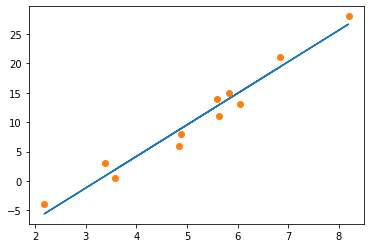

In [135]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(0.1 * t_u.numpy(), t_p.detach().numpy()) # predicted
plt.plot(0.1 * t_u.numpy(), t_c.numpy(), 'o')     # computed 

# Validation Set

How do we optimize the training set and test it with a validation set using
random samples?

The objective of the train and validation set is:
 - to build a model in a training set
 - make the prediction on the validation set,
 - and check the accuracy of the model.

We take 20% of the data as validation samples using shuffled_indices

In [157]:
n_samples = t_u.shape[0]                           # take the lenght of the tensor t_u
n_val = int(0.2 * n_samples)                       # calculate 20% of the length

shuffled_indices = torch.randperm(n_samples)       # suffle indeces 

train_indices = shuffled_indices[:-n_val]          # take the indeces of 80% of data to train  
val_indices = shuffled_indices[-n_val:]            # take the indeces of 20% of data to validation

print('Train Indices:      ', train_indices)
print('Validation Indices: ', val_indices)

# select the Train data knowing the indexes
t_u_train = t_u[train_indices]                    
t_c_train = t_c[train_indices]                    

# select the Validation data knowing the indexes
t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

Train Indices:       tensor([ 8,  1, 10,  9,  4,  6,  3,  0,  2])
Validation Indices:  tensor([5, 7])


Now let’s run the train and validation process. 

We first take the training input data and multiply it by the parameter’s next line.

        t_un_train = 0.1 * t_u_train
        t_un_val = 0.1 * t_u_val

- To train and validation data: We make a prediction and compute the loss function
- In the backpropagation process, we calculate the **gradient of the loss function for the training set**, and
- update the parameters using the optimizer

In [159]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

params = torch.tensor([1.0, 0.0], requires_grad=True)      # initiate the "w" and "b" parameters fo the model
learning_rate = 1e-2                                       # learning rate of the model
optimizer = optim.SGD([params], lr=learning_rate)          # SGD optimizer

nepochs = 5000
t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

for epoch in range(nepochs):
    
    # forward pass
    
    # Train
    t_p_train = model(t_un_train, *params)
    loss_train = loss_fn(t_p_train, t_c_train)
    # Validation
    t_p_val = model(t_un_val, *params)
    loss_val = loss_fn(t_p_val, t_c_val)

    print('Epoch %d, Training loss %f, Validation loss %f' % (epoch, float(loss_train), 
                                                              float(loss_val)))
    
    # backward pass
    optimizer.zero_grad()          # * At each epoch is necessary zero the grads to avoid errors accumulated.
    loss_train.backward()          # * To calculate the gradients of the loss Train function.
    optimizer.step()               # * Here we update the parameters. 
                                   # * So we don't need to build a equation to update the parameters, 
                                   # as we did in the last example, because we pass the parameters 
                                   # as an element to optimizer. 

t_p = model(t_un, *params)

params


Epoch 0, Training loss 92.904808, Validation loss 23.932251
Epoch 1, Training loss 32.466358, Validation loss 36.438267
Epoch 2, Training loss 25.994892, Validation loss 46.353531
Epoch 3, Training loss 25.259869, Validation loss 50.113029
Epoch 4, Training loss 25.134716, Validation loss 51.303715
Epoch 5, Training loss 25.074493, Validation loss 51.598190
Epoch 6, Training loss 25.021292, Validation loss 51.594749
Epoch 7, Training loss 24.968941, Validation loss 51.493855
Epoch 8, Training loss 24.916788, Validation loss 51.361458
Epoch 9, Training loss 24.864782, Validation loss 51.219025
Epoch 10, Training loss 24.812887, Validation loss 51.073601
Epoch 11, Training loss 24.761118, Validation loss 50.927471
Epoch 12, Training loss 24.709471, Validation loss 50.781364
Epoch 13, Training loss 24.657959, Validation loss 50.635540
Epoch 14, Training loss 24.606556, Validation loss 50.490051
Epoch 15, Training loss 24.555281, Validation loss 50.344948
Epoch 16, Training loss 24.504128,

Epoch 307, Training loss 13.778085, Validation loss 21.060759
Epoch 308, Training loss 13.752563, Validation loss 20.995485
Epoch 309, Training loss 13.727101, Validation loss 20.930397
Epoch 310, Training loss 13.701704, Validation loss 20.865488
Epoch 311, Training loss 13.676364, Validation loss 20.800772
Epoch 312, Training loss 13.651087, Validation loss 20.736229
Epoch 313, Training loss 13.625867, Validation loss 20.671871
Epoch 314, Training loss 13.600707, Validation loss 20.607698
Epoch 315, Training loss 13.575607, Validation loss 20.543697
Epoch 316, Training loss 13.550567, Validation loss 20.479883
Epoch 317, Training loss 13.525584, Validation loss 20.416245
Epoch 318, Training loss 13.500667, Validation loss 20.352779
Epoch 319, Training loss 13.475805, Validation loss 20.289507
Epoch 320, Training loss 13.450999, Validation loss 20.226404
Epoch 321, Training loss 13.426259, Validation loss 20.163481
Epoch 322, Training loss 13.401570, Validation loss 20.100735
Epoch 32

Epoch 604, Training loss 8.337899, Validation loss 8.025191
Epoch 605, Training loss 8.325318, Validation loss 7.997957
Epoch 606, Training loss 8.312761, Validation loss 7.970804
Epoch 607, Training loss 8.300240, Validation loss 7.943732
Epoch 608, Training loss 8.287749, Validation loss 7.916756
Epoch 609, Training loss 8.275287, Validation loss 7.889854
Epoch 610, Training loss 8.262853, Validation loss 7.863033
Epoch 611, Training loss 8.250448, Validation loss 7.836293
Epoch 612, Training loss 8.238076, Validation loss 7.809649
Epoch 613, Training loss 8.225729, Validation loss 7.783077
Epoch 614, Training loss 8.213414, Validation loss 7.756597
Epoch 615, Training loss 8.201130, Validation loss 7.730193
Epoch 616, Training loss 8.188872, Validation loss 7.703870
Epoch 617, Training loss 8.176646, Validation loss 7.677634
Epoch 618, Training loss 8.164444, Validation loss 7.651475
Epoch 619, Training loss 8.152276, Validation loss 7.625396
Epoch 620, Training loss 8.140135, Valid

Epoch 981, Training loss 5.203506, Validation loss 2.148854
Epoch 982, Training loss 5.198378, Validation loss 2.141585
Epoch 983, Training loss 5.193262, Validation loss 2.134342
Epoch 984, Training loss 5.188160, Validation loss 2.127131
Epoch 985, Training loss 5.183072, Validation loss 2.119953
Epoch 986, Training loss 5.177992, Validation loss 2.112800
Epoch 987, Training loss 5.172927, Validation loss 2.105681
Epoch 988, Training loss 5.167873, Validation loss 2.098590
Epoch 989, Training loss 5.162828, Validation loss 2.091529
Epoch 990, Training loss 5.157797, Validation loss 2.084490
Epoch 991, Training loss 5.152781, Validation loss 2.077487
Epoch 992, Training loss 5.147774, Validation loss 2.070516
Epoch 993, Training loss 5.142781, Validation loss 2.063569
Epoch 994, Training loss 5.137799, Validation loss 2.056650
Epoch 995, Training loss 5.132826, Validation loss 2.049761
Epoch 996, Training loss 5.127867, Validation loss 2.042903
Epoch 997, Training loss 5.122923, Valid

Epoch 1327, Training loss 3.993574, Validation loss 0.938910
Epoch 1328, Training loss 3.991323, Validation loss 0.938092
Epoch 1329, Training loss 3.989080, Validation loss 0.937277
Epoch 1330, Training loss 3.986841, Validation loss 0.936479
Epoch 1331, Training loss 3.984607, Validation loss 0.935684
Epoch 1332, Training loss 3.982379, Validation loss 0.934906
Epoch 1333, Training loss 3.980156, Validation loss 0.934137
Epoch 1334, Training loss 3.977938, Validation loss 0.933373
Epoch 1335, Training loss 3.975728, Validation loss 0.932623
Epoch 1336, Training loss 3.973521, Validation loss 0.931885
Epoch 1337, Training loss 3.971320, Validation loss 0.931154
Epoch 1338, Training loss 3.969122, Validation loss 0.930436
Epoch 1339, Training loss 3.966929, Validation loss 0.929725
Epoch 1340, Training loss 3.964746, Validation loss 0.929022
Epoch 1341, Training loss 3.962565, Validation loss 0.928330
Epoch 1342, Training loss 3.960389, Validation loss 0.927650
Epoch 1343, Training los

Epoch 1707, Training loss 3.430503, Validation loss 1.122478
Epoch 1708, Training loss 3.429594, Validation loss 1.123771
Epoch 1709, Training loss 3.428685, Validation loss 1.125064
Epoch 1710, Training loss 3.427781, Validation loss 1.126360
Epoch 1711, Training loss 3.426877, Validation loss 1.127656
Epoch 1712, Training loss 3.425977, Validation loss 1.128957
Epoch 1713, Training loss 3.425076, Validation loss 1.130258
Epoch 1714, Training loss 3.424180, Validation loss 1.131562
Epoch 1715, Training loss 3.423284, Validation loss 1.132868
Epoch 1716, Training loss 3.422391, Validation loss 1.134178
Epoch 1717, Training loss 3.421500, Validation loss 1.135489
Epoch 1718, Training loss 3.420611, Validation loss 1.136802
Epoch 1719, Training loss 3.419725, Validation loss 1.138116
Epoch 1720, Training loss 3.418842, Validation loss 1.139432
Epoch 1721, Training loss 3.417958, Validation loss 1.140753
Epoch 1722, Training loss 3.417078, Validation loss 1.142075
Epoch 1723, Training los

Epoch 2053, Training loss 3.215744, Validation loss 1.640200
Epoch 2054, Training loss 3.215346, Validation loss 1.641764
Epoch 2055, Training loss 3.214946, Validation loss 1.643326
Epoch 2056, Training loss 3.214551, Validation loss 1.644891
Epoch 2057, Training loss 3.214154, Validation loss 1.646453
Epoch 2058, Training loss 3.213759, Validation loss 1.648018
Epoch 2059, Training loss 3.213364, Validation loss 1.649581
Epoch 2060, Training loss 3.212971, Validation loss 1.651141
Epoch 2061, Training loss 3.212579, Validation loss 1.652706
Epoch 2062, Training loss 3.212186, Validation loss 1.654268
Epoch 2063, Training loss 3.211797, Validation loss 1.655830
Epoch 2064, Training loss 3.211406, Validation loss 1.657391
Epoch 2065, Training loss 3.211017, Validation loss 1.658953
Epoch 2066, Training loss 3.210628, Validation loss 1.660515
Epoch 2067, Training loss 3.210242, Validation loss 1.662074
Epoch 2068, Training loss 3.209856, Validation loss 1.663636
Epoch 2069, Training los

Epoch 2378, Training loss 3.125305, Validation loss 2.121913
Epoch 2379, Training loss 3.125121, Validation loss 2.123279
Epoch 2380, Training loss 3.124938, Validation loss 2.124643
Epoch 2381, Training loss 3.124755, Validation loss 2.126007
Epoch 2382, Training loss 3.124571, Validation loss 2.127370
Epoch 2383, Training loss 3.124390, Validation loss 2.128731
Epoch 2384, Training loss 3.124208, Validation loss 2.130090
Epoch 2385, Training loss 3.124025, Validation loss 2.131451
Epoch 2386, Training loss 3.123845, Validation loss 2.132810
Epoch 2387, Training loss 3.123665, Validation loss 2.134169
Epoch 2388, Training loss 3.123485, Validation loss 2.135525
Epoch 2389, Training loss 3.123305, Validation loss 2.136881
Epoch 2390, Training loss 3.123126, Validation loss 2.138239
Epoch 2391, Training loss 3.122944, Validation loss 2.139594
Epoch 2392, Training loss 3.122767, Validation loss 2.140948
Epoch 2393, Training loss 3.122589, Validation loss 2.142300
Epoch 2394, Training los

Epoch 2721, Training loss 3.082097, Validation loss 2.536766
Epoch 2722, Training loss 3.082014, Validation loss 2.537814
Epoch 2723, Training loss 3.081934, Validation loss 2.538864
Epoch 2724, Training loss 3.081854, Validation loss 2.539912
Epoch 2725, Training loss 3.081773, Validation loss 2.540961
Epoch 2726, Training loss 3.081692, Validation loss 2.542007
Epoch 2727, Training loss 3.081612, Validation loss 2.543053
Epoch 2728, Training loss 3.081533, Validation loss 2.544098
Epoch 2729, Training loss 3.081451, Validation loss 2.545144
Epoch 2730, Training loss 3.081371, Validation loss 2.546186
Epoch 2731, Training loss 3.081292, Validation loss 2.547227
Epoch 2732, Training loss 3.081212, Validation loss 2.548269
Epoch 2733, Training loss 3.081132, Validation loss 2.549308
Epoch 2734, Training loss 3.081054, Validation loss 2.550349
Epoch 2735, Training loss 3.080975, Validation loss 2.551387
Epoch 2736, Training loss 3.080898, Validation loss 2.552425
Epoch 2737, Training los

Epoch 3074, Training loss 3.062648, Validation loss 2.853651
Epoch 3075, Training loss 3.062613, Validation loss 2.854403
Epoch 3076, Training loss 3.062577, Validation loss 2.855158
Epoch 3077, Training loss 3.062543, Validation loss 2.855910
Epoch 3078, Training loss 3.062510, Validation loss 2.856663
Epoch 3079, Training loss 3.062473, Validation loss 2.857413
Epoch 3080, Training loss 3.062440, Validation loss 2.858160
Epoch 3081, Training loss 3.062405, Validation loss 2.858911
Epoch 3082, Training loss 3.062372, Validation loss 2.859659
Epoch 3083, Training loss 3.062335, Validation loss 2.860407
Epoch 3084, Training loss 3.062302, Validation loss 2.861151
Epoch 3085, Training loss 3.062267, Validation loss 2.861900
Epoch 3086, Training loss 3.062233, Validation loss 2.862644
Epoch 3087, Training loss 3.062199, Validation loss 2.863389
Epoch 3088, Training loss 3.062166, Validation loss 2.864133
Epoch 3089, Training loss 3.062132, Validation loss 2.864876
Epoch 3090, Training los

Epoch 3445, Training loss 3.053991, Validation loss 3.086386
Epoch 3446, Training loss 3.053975, Validation loss 3.086900
Epoch 3447, Training loss 3.053964, Validation loss 3.087413
Epoch 3448, Training loss 3.053948, Validation loss 3.087922
Epoch 3449, Training loss 3.053932, Validation loss 3.088433
Epoch 3450, Training loss 3.053918, Validation loss 3.088945
Epoch 3451, Training loss 3.053905, Validation loss 3.089456
Epoch 3452, Training loss 3.053892, Validation loss 3.089967
Epoch 3453, Training loss 3.053875, Validation loss 3.090474
Epoch 3454, Training loss 3.053861, Validation loss 3.090982
Epoch 3455, Training loss 3.053848, Validation loss 3.091491
Epoch 3456, Training loss 3.053832, Validation loss 3.091998
Epoch 3457, Training loss 3.053818, Validation loss 3.092503
Epoch 3458, Training loss 3.053806, Validation loss 3.093009
Epoch 3459, Training loss 3.053791, Validation loss 3.093513
Epoch 3460, Training loss 3.053777, Validation loss 3.094022
Epoch 3461, Training los

Epoch 3790, Training loss 3.050573, Validation loss 3.233924
Epoch 3791, Training loss 3.050567, Validation loss 3.234278
Epoch 3792, Training loss 3.050561, Validation loss 3.234627
Epoch 3793, Training loss 3.050555, Validation loss 3.234978
Epoch 3794, Training loss 3.050546, Validation loss 3.235327
Epoch 3795, Training loss 3.050542, Validation loss 3.235677
Epoch 3796, Training loss 3.050535, Validation loss 3.236026
Epoch 3797, Training loss 3.050529, Validation loss 3.236376
Epoch 3798, Training loss 3.050522, Validation loss 3.236727
Epoch 3799, Training loss 3.050515, Validation loss 3.237072
Epoch 3800, Training loss 3.050511, Validation loss 3.237420
Epoch 3801, Training loss 3.050504, Validation loss 3.237766
Epoch 3802, Training loss 3.050497, Validation loss 3.238114
Epoch 3803, Training loss 3.050493, Validation loss 3.238463
Epoch 3804, Training loss 3.050487, Validation loss 3.238810
Epoch 3805, Training loss 3.050479, Validation loss 3.239154
Epoch 3806, Training los

Epoch 4140, Training loss 3.049056, Validation loss 3.335606
Epoch 4141, Training loss 3.049055, Validation loss 3.335843
Epoch 4142, Training loss 3.049052, Validation loss 3.336077
Epoch 4143, Training loss 3.049047, Validation loss 3.336314
Epoch 4144, Training loss 3.049046, Validation loss 3.336551
Epoch 4145, Training loss 3.049042, Validation loss 3.336788
Epoch 4146, Training loss 3.049041, Validation loss 3.337023
Epoch 4147, Training loss 3.049036, Validation loss 3.337257
Epoch 4148, Training loss 3.049035, Validation loss 3.337491
Epoch 4149, Training loss 3.049033, Validation loss 3.337726
Epoch 4150, Training loss 3.049028, Validation loss 3.337958
Epoch 4151, Training loss 3.049027, Validation loss 3.338191
Epoch 4152, Training loss 3.049024, Validation loss 3.338425
Epoch 4153, Training loss 3.049021, Validation loss 3.338659
Epoch 4154, Training loss 3.049019, Validation loss 3.338894
Epoch 4155, Training loss 3.049014, Validation loss 3.339128
Epoch 4156, Training los

Epoch 4532, Training loss 3.048350, Validation loss 3.410306
Epoch 4533, Training loss 3.048350, Validation loss 3.410456
Epoch 4534, Training loss 3.048347, Validation loss 3.410608
Epoch 4535, Training loss 3.048346, Validation loss 3.410760
Epoch 4536, Training loss 3.048346, Validation loss 3.410910
Epoch 4537, Training loss 3.048343, Validation loss 3.411060
Epoch 4538, Training loss 3.048343, Validation loss 3.411212
Epoch 4539, Training loss 3.048341, Validation loss 3.411361
Epoch 4540, Training loss 3.048341, Validation loss 3.411512
Epoch 4541, Training loss 3.048339, Validation loss 3.411660
Epoch 4542, Training loss 3.048337, Validation loss 3.411808
Epoch 4543, Training loss 3.048336, Validation loss 3.411954
Epoch 4544, Training loss 3.048338, Validation loss 3.412103
Epoch 4545, Training loss 3.048334, Validation loss 3.412251
Epoch 4546, Training loss 3.048335, Validation loss 3.412400
Epoch 4547, Training loss 3.048331, Validation loss 3.412546
Epoch 4548, Training los

Epoch 4877, Training loss 3.048094, Validation loss 3.453115
Epoch 4878, Training loss 3.048092, Validation loss 3.453217
Epoch 4879, Training loss 3.048092, Validation loss 3.453318
Epoch 4880, Training loss 3.048091, Validation loss 3.453420
Epoch 4881, Training loss 3.048090, Validation loss 3.453521
Epoch 4882, Training loss 3.048090, Validation loss 3.453621
Epoch 4883, Training loss 3.048090, Validation loss 3.453722
Epoch 4884, Training loss 3.048088, Validation loss 3.453825
Epoch 4885, Training loss 3.048089, Validation loss 3.453923
Epoch 4886, Training loss 3.048088, Validation loss 3.454021
Epoch 4887, Training loss 3.048088, Validation loss 3.454120
Epoch 4888, Training loss 3.048086, Validation loss 3.454216
Epoch 4889, Training loss 3.048088, Validation loss 3.454315
Epoch 4890, Training loss 3.048087, Validation loss 3.454415
Epoch 4891, Training loss 3.048085, Validation loss 3.454514
Epoch 4892, Training loss 3.048085, Validation loss 3.454612
Epoch 4893, Training los

tensor([  5.6240, -18.7966], requires_grad=True)

## Disabling Gradient Calculation
Disabling gradient calculation is useful
for drawing inferences, when we are sure that we will not call Tensor.
backward().

This reduces memory consumption for computations that
would otherwise be *requires_grad=True*.

This is used in the validation _foward pass_.

In [161]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

params = torch.tensor([1.0, 0.0], requires_grad=True)      # initiate the "w" and "b" parameters fo the model
learning_rate = 1e-2                                       # learning rate of the model
optimizer = optim.SGD([params], lr=learning_rate)          # SGD optimizer

nepochs = 5000
t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

for epoch in range(nepochs):
    
    # forward pass
    
    # Train
    t_p_train = model(t_un_train, *params)
    loss_train = loss_fn(t_p_train, t_c_train)
    # Validation
    with torch.no_grad():
        t_p_val = model(t_un_val, *params)
        loss_val = loss_fn(t_p_val, t_c_val)

    print('Epoch %d, Training loss %f, Validation loss %f' % (epoch, float(loss_train), 
                                                              float(loss_val)))
    
    # backward pass
    optimizer.zero_grad()          # * At each epoch is necessary zero the grads to avoid errors accumulated.
    loss_train.backward()          # * To calculate the gradients of the loss Train function.
    optimizer.step()               # * Here we update the parameters. 
                                   # * So we don't need to build a equation to update the parameters, 
                                   # as we did in the last example, because we pass the parameters 
                                   # as an element to optimizer. 

t_p = model(t_un, *params)

params


Epoch 0, Training loss 92.904808, Validation loss 23.932251
Epoch 1, Training loss 32.466358, Validation loss 36.438267
Epoch 2, Training loss 25.994892, Validation loss 46.353531
Epoch 3, Training loss 25.259869, Validation loss 50.113029
Epoch 4, Training loss 25.134716, Validation loss 51.303715
Epoch 5, Training loss 25.074493, Validation loss 51.598190
Epoch 6, Training loss 25.021292, Validation loss 51.594749
Epoch 7, Training loss 24.968941, Validation loss 51.493855
Epoch 8, Training loss 24.916788, Validation loss 51.361458
Epoch 9, Training loss 24.864782, Validation loss 51.219025
Epoch 10, Training loss 24.812887, Validation loss 51.073601
Epoch 11, Training loss 24.761118, Validation loss 50.927471
Epoch 12, Training loss 24.709471, Validation loss 50.781364
Epoch 13, Training loss 24.657959, Validation loss 50.635540
Epoch 14, Training loss 24.606556, Validation loss 50.490051
Epoch 15, Training loss 24.555281, Validation loss 50.344948
Epoch 16, Training loss 24.504128,

Epoch 308, Training loss 13.752563, Validation loss 20.995485
Epoch 309, Training loss 13.727101, Validation loss 20.930397
Epoch 310, Training loss 13.701704, Validation loss 20.865488
Epoch 311, Training loss 13.676364, Validation loss 20.800772
Epoch 312, Training loss 13.651087, Validation loss 20.736229
Epoch 313, Training loss 13.625867, Validation loss 20.671871
Epoch 314, Training loss 13.600707, Validation loss 20.607698
Epoch 315, Training loss 13.575607, Validation loss 20.543697
Epoch 316, Training loss 13.550567, Validation loss 20.479883
Epoch 317, Training loss 13.525584, Validation loss 20.416245
Epoch 318, Training loss 13.500667, Validation loss 20.352779
Epoch 319, Training loss 13.475805, Validation loss 20.289507
Epoch 320, Training loss 13.450999, Validation loss 20.226404
Epoch 321, Training loss 13.426259, Validation loss 20.163481
Epoch 322, Training loss 13.401570, Validation loss 20.100735
Epoch 323, Training loss 13.376949, Validation loss 20.038166
Epoch 32

Epoch 651, Training loss 7.777766, Validation loss 6.832818
Epoch 652, Training loss 7.766519, Validation loss 6.809314
Epoch 653, Training loss 7.755295, Validation loss 6.785889
Epoch 654, Training loss 7.744099, Validation loss 6.762536
Epoch 655, Training loss 7.732932, Validation loss 6.739261
Epoch 656, Training loss 7.721788, Validation loss 6.716057
Epoch 657, Training loss 7.710670, Validation loss 6.692928
Epoch 658, Training loss 7.699583, Validation loss 6.669873
Epoch 659, Training loss 7.688517, Validation loss 6.646889
Epoch 660, Training loss 7.677480, Validation loss 6.623981
Epoch 661, Training loss 7.666468, Validation loss 6.601149
Epoch 662, Training loss 7.655483, Validation loss 6.578381
Epoch 663, Training loss 7.644525, Validation loss 6.555689
Epoch 664, Training loss 7.633591, Validation loss 6.533072
Epoch 665, Training loss 7.622684, Validation loss 6.510520
Epoch 666, Training loss 7.611804, Validation loss 6.488048
Epoch 667, Training loss 7.600948, Valid

Epoch 1005, Training loss 5.083766, Validation loss 1.982448
Epoch 1006, Training loss 5.078922, Validation loss 1.975872
Epoch 1007, Training loss 5.074093, Validation loss 1.969324
Epoch 1008, Training loss 5.069272, Validation loss 1.962801
Epoch 1009, Training loss 5.064463, Validation loss 1.956307
Epoch 1010, Training loss 5.059667, Validation loss 1.949843
Epoch 1011, Training loss 5.054884, Validation loss 1.943404
Epoch 1012, Training loss 5.050111, Validation loss 1.936991
Epoch 1013, Training loss 5.045348, Validation loss 1.930609
Epoch 1014, Training loss 5.040596, Validation loss 1.924254
Epoch 1015, Training loss 5.035857, Validation loss 1.917930
Epoch 1016, Training loss 5.031130, Validation loss 1.911626
Epoch 1017, Training loss 5.026412, Validation loss 1.905356
Epoch 1018, Training loss 5.021706, Validation loss 1.899107
Epoch 1019, Training loss 5.017010, Validation loss 1.892884
Epoch 1020, Training loss 5.012330, Validation loss 1.886693
Epoch 1021, Training los

Epoch 1396, Training loss 3.850282, Validation loss 0.904640
Epoch 1397, Training loss 3.848372, Validation loss 0.904451
Epoch 1398, Training loss 3.846468, Validation loss 0.904275
Epoch 1399, Training loss 3.844571, Validation loss 0.904101
Epoch 1400, Training loss 3.842673, Validation loss 0.903936
Epoch 1401, Training loss 3.840783, Validation loss 0.903782
Epoch 1402, Training loss 3.838897, Validation loss 0.903632
Epoch 1403, Training loss 3.837017, Validation loss 0.903495
Epoch 1404, Training loss 3.835140, Validation loss 0.903365
Epoch 1405, Training loss 3.833268, Validation loss 0.903240
Epoch 1406, Training loss 3.831401, Validation loss 0.903125
Epoch 1407, Training loss 3.829536, Validation loss 0.903017
Epoch 1408, Training loss 3.827677, Validation loss 0.902915
Epoch 1409, Training loss 3.825824, Validation loss 0.902825
Epoch 1410, Training loss 3.823972, Validation loss 0.902740
Epoch 1411, Training loss 3.822126, Validation loss 0.902666
Epoch 1412, Training los

Epoch 1759, Training loss 3.385942, Validation loss 1.192320
Epoch 1760, Training loss 3.385138, Validation loss 1.193713
Epoch 1761, Training loss 3.384336, Validation loss 1.195106
Epoch 1762, Training loss 3.383535, Validation loss 1.196502
Epoch 1763, Training loss 3.382738, Validation loss 1.197898
Epoch 1764, Training loss 3.381941, Validation loss 1.199297
Epoch 1765, Training loss 3.381146, Validation loss 1.200698
Epoch 1766, Training loss 3.380353, Validation loss 1.202100
Epoch 1767, Training loss 3.379564, Validation loss 1.203506
Epoch 1768, Training loss 3.378775, Validation loss 1.204911
Epoch 1769, Training loss 3.377987, Validation loss 1.206318
Epoch 1770, Training loss 3.377202, Validation loss 1.207725
Epoch 1771, Training loss 3.376419, Validation loss 1.209136
Epoch 1772, Training loss 3.375638, Validation loss 1.210548
Epoch 1773, Training loss 3.374857, Validation loss 1.211961
Epoch 1774, Training loss 3.374081, Validation loss 1.213377
Epoch 1775, Training los

Epoch 2097, Training loss 3.199049, Validation loss 1.708768
Epoch 2098, Training loss 3.198688, Validation loss 1.710319
Epoch 2099, Training loss 3.198331, Validation loss 1.711869
Epoch 2100, Training loss 3.197973, Validation loss 1.713421
Epoch 2101, Training loss 3.197616, Validation loss 1.714971
Epoch 2102, Training loss 3.197260, Validation loss 1.716522
Epoch 2103, Training loss 3.196906, Validation loss 1.718073
Epoch 2104, Training loss 3.196550, Validation loss 1.719619
Epoch 2105, Training loss 3.196195, Validation loss 1.721169
Epoch 2106, Training loss 3.195844, Validation loss 1.722718
Epoch 2107, Training loss 3.195492, Validation loss 1.724264
Epoch 2108, Training loss 3.195140, Validation loss 1.725812
Epoch 2109, Training loss 3.194790, Validation loss 1.727360
Epoch 2110, Training loss 3.194441, Validation loss 1.728907
Epoch 2111, Training loss 3.194093, Validation loss 1.730453
Epoch 2112, Training loss 3.193746, Validation loss 1.732000
Epoch 2113, Training los

Epoch 2387, Training loss 3.123665, Validation loss 2.134169
Epoch 2388, Training loss 3.123485, Validation loss 2.135525
Epoch 2389, Training loss 3.123305, Validation loss 2.136881
Epoch 2390, Training loss 3.123126, Validation loss 2.138239
Epoch 2391, Training loss 3.122944, Validation loss 2.139594
Epoch 2392, Training loss 3.122767, Validation loss 2.140948
Epoch 2393, Training loss 3.122589, Validation loss 2.142300
Epoch 2394, Training loss 3.122411, Validation loss 2.143652
Epoch 2395, Training loss 3.122235, Validation loss 2.145001
Epoch 2396, Training loss 3.122058, Validation loss 2.146353
Epoch 2397, Training loss 3.121880, Validation loss 2.147703
Epoch 2398, Training loss 3.121706, Validation loss 2.149053
Epoch 2399, Training loss 3.121531, Validation loss 2.150401
Epoch 2400, Training loss 3.121354, Validation loss 2.151747
Epoch 2401, Training loss 3.121179, Validation loss 2.153091
Epoch 2402, Training loss 3.121006, Validation loss 2.154436
Epoch 2403, Training los

Epoch 2745, Training loss 3.080195, Validation loss 2.561722
Epoch 2746, Training loss 3.080119, Validation loss 2.562750
Epoch 2747, Training loss 3.080043, Validation loss 2.563777
Epoch 2748, Training loss 3.079967, Validation loss 2.564806
Epoch 2749, Training loss 3.079892, Validation loss 2.565831
Epoch 2750, Training loss 3.079814, Validation loss 2.566855
Epoch 2751, Training loss 3.079739, Validation loss 2.567881
Epoch 2752, Training loss 3.079664, Validation loss 2.568903
Epoch 2753, Training loss 3.079587, Validation loss 2.569924
Epoch 2754, Training loss 3.079513, Validation loss 2.570947
Epoch 2755, Training loss 3.079437, Validation loss 2.571965
Epoch 2756, Training loss 3.079360, Validation loss 2.572985
Epoch 2757, Training loss 3.079287, Validation loss 2.574004
Epoch 2758, Training loss 3.079212, Validation loss 2.575020
Epoch 2759, Training loss 3.079138, Validation loss 2.576038
Epoch 2760, Training loss 3.079064, Validation loss 2.577054
Epoch 2761, Training los

Epoch 3020, Training loss 3.064674, Validation loss 2.811814
Epoch 3021, Training loss 3.064633, Validation loss 2.812610
Epoch 3022, Training loss 3.064594, Validation loss 2.813404
Epoch 3023, Training loss 3.064556, Validation loss 2.814197
Epoch 3024, Training loss 3.064514, Validation loss 2.814991
Epoch 3025, Training loss 3.064473, Validation loss 2.815782
Epoch 3026, Training loss 3.064435, Validation loss 2.816576
Epoch 3027, Training loss 3.064396, Validation loss 2.817365
Epoch 3028, Training loss 3.064358, Validation loss 2.818154
Epoch 3029, Training loss 3.064317, Validation loss 2.818944
Epoch 3030, Training loss 3.064278, Validation loss 2.819734
Epoch 3031, Training loss 3.064240, Validation loss 2.820520
Epoch 3032, Training loss 3.064202, Validation loss 2.821306
Epoch 3033, Training loss 3.064163, Validation loss 2.822091
Epoch 3034, Training loss 3.064124, Validation loss 2.822878
Epoch 3035, Training loss 3.064085, Validation loss 2.823661
Epoch 3036, Training los

Epoch 3274, Training loss 3.057056, Validation loss 2.990182
Epoch 3275, Training loss 3.057034, Validation loss 2.990794
Epoch 3276, Training loss 3.057015, Validation loss 2.991407
Epoch 3277, Training loss 3.056992, Validation loss 2.992020
Epoch 3278, Training loss 3.056968, Validation loss 2.992635
Epoch 3279, Training loss 3.056948, Validation loss 2.993245
Epoch 3280, Training loss 3.056926, Validation loss 2.993857
Epoch 3281, Training loss 3.056905, Validation loss 2.994469
Epoch 3282, Training loss 3.056884, Validation loss 2.995077
Epoch 3283, Training loss 3.056862, Validation loss 2.995685
Epoch 3284, Training loss 3.056840, Validation loss 2.996295
Epoch 3285, Training loss 3.056818, Validation loss 2.996904
Epoch 3286, Training loss 3.056798, Validation loss 2.997512
Epoch 3287, Training loss 3.056777, Validation loss 2.998118
Epoch 3288, Training loss 3.056757, Validation loss 2.998726
Epoch 3289, Training loss 3.056733, Validation loss 2.999330
Epoch 3290, Training los

Epoch 3531, Training loss 3.052860, Validation loss 3.128515
Epoch 3532, Training loss 3.052851, Validation loss 3.128983
Epoch 3533, Training loss 3.052838, Validation loss 3.129450
Epoch 3534, Training loss 3.052827, Validation loss 3.129918
Epoch 3535, Training loss 3.052813, Validation loss 3.130383
Epoch 3536, Training loss 3.052803, Validation loss 3.130847
Epoch 3537, Training loss 3.052791, Validation loss 3.131313
Epoch 3538, Training loss 3.052779, Validation loss 3.131778
Epoch 3539, Training loss 3.052768, Validation loss 3.132241
Epoch 3540, Training loss 3.052756, Validation loss 3.132705
Epoch 3541, Training loss 3.052743, Validation loss 3.133167
Epoch 3542, Training loss 3.052732, Validation loss 3.133630
Epoch 3543, Training loss 3.052721, Validation loss 3.134092
Epoch 3544, Training loss 3.052710, Validation loss 3.134552
Epoch 3545, Training loss 3.052699, Validation loss 3.135010
Epoch 3546, Training loss 3.052685, Validation loss 3.135473
Epoch 3547, Training los

Epoch 3783, Training loss 3.050619, Validation loss 3.231455
Epoch 3784, Training loss 3.050612, Validation loss 3.231811
Epoch 3785, Training loss 3.050607, Validation loss 3.232165
Epoch 3786, Training loss 3.050598, Validation loss 3.232516
Epoch 3787, Training loss 3.050592, Validation loss 3.232869
Epoch 3788, Training loss 3.050586, Validation loss 3.233219
Epoch 3789, Training loss 3.050579, Validation loss 3.233571
Epoch 3790, Training loss 3.050573, Validation loss 3.233924
Epoch 3791, Training loss 3.050567, Validation loss 3.234278
Epoch 3792, Training loss 3.050561, Validation loss 3.234627
Epoch 3793, Training loss 3.050555, Validation loss 3.234978
Epoch 3794, Training loss 3.050546, Validation loss 3.235327
Epoch 3795, Training loss 3.050542, Validation loss 3.235677
Epoch 3796, Training loss 3.050535, Validation loss 3.236026
Epoch 3797, Training loss 3.050529, Validation loss 3.236376
Epoch 3798, Training loss 3.050522, Validation loss 3.236727
Epoch 3799, Training los

Epoch 4047, Training loss 3.049346, Validation loss 3.312387
Epoch 4048, Training loss 3.049340, Validation loss 3.312648
Epoch 4049, Training loss 3.049338, Validation loss 3.312912
Epoch 4050, Training loss 3.049334, Validation loss 3.313173
Epoch 4051, Training loss 3.049332, Validation loss 3.313438
Epoch 4052, Training loss 3.049327, Validation loss 3.313700
Epoch 4053, Training loss 3.049326, Validation loss 3.313962
Epoch 4054, Training loss 3.049323, Validation loss 3.314222
Epoch 4055, Training loss 3.049318, Validation loss 3.314481
Epoch 4056, Training loss 3.049317, Validation loss 3.314741
Epoch 4057, Training loss 3.049310, Validation loss 3.315002
Epoch 4058, Training loss 3.049309, Validation loss 3.315262
Epoch 4059, Training loss 3.049304, Validation loss 3.315522
Epoch 4060, Training loss 3.049302, Validation loss 3.315781
Epoch 4061, Training loss 3.049298, Validation loss 3.316042
Epoch 4062, Training loss 3.049294, Validation loss 3.316303
Epoch 4063, Training los

Epoch 4319, Training loss 3.048651, Validation loss 3.373909
Epoch 4320, Training loss 3.048651, Validation loss 3.374105
Epoch 4321, Training loss 3.048648, Validation loss 3.374296
Epoch 4322, Training loss 3.048648, Validation loss 3.374486
Epoch 4323, Training loss 3.048645, Validation loss 3.374676
Epoch 4324, Training loss 3.048644, Validation loss 3.374869
Epoch 4325, Training loss 3.048640, Validation loss 3.375059
Epoch 4326, Training loss 3.048640, Validation loss 3.375249
Epoch 4327, Training loss 3.048638, Validation loss 3.375441
Epoch 4328, Training loss 3.048637, Validation loss 3.375632
Epoch 4329, Training loss 3.048633, Validation loss 3.375824
Epoch 4330, Training loss 3.048632, Validation loss 3.376016
Epoch 4331, Training loss 3.048630, Validation loss 3.376205
Epoch 4332, Training loss 3.048628, Validation loss 3.376397
Epoch 4333, Training loss 3.048627, Validation loss 3.376589
Epoch 4334, Training loss 3.048626, Validation loss 3.376778
Epoch 4335, Training los

Epoch 4593, Training loss 3.048286, Validation loss 3.419181
Epoch 4594, Training loss 3.048286, Validation loss 3.419321
Epoch 4595, Training loss 3.048285, Validation loss 3.419460
Epoch 4596, Training loss 3.048284, Validation loss 3.419601
Epoch 4597, Training loss 3.048283, Validation loss 3.419740
Epoch 4598, Training loss 3.048282, Validation loss 3.419881
Epoch 4599, Training loss 3.048280, Validation loss 3.420020
Epoch 4600, Training loss 3.048280, Validation loss 3.420161
Epoch 4601, Training loss 3.048281, Validation loss 3.420300
Epoch 4602, Training loss 3.048278, Validation loss 3.420440
Epoch 4603, Training loss 3.048277, Validation loss 3.420580
Epoch 4604, Training loss 3.048277, Validation loss 3.420721
Epoch 4605, Training loss 3.048277, Validation loss 3.420860
Epoch 4606, Training loss 3.048275, Validation loss 3.420997
Epoch 4607, Training loss 3.048273, Validation loss 3.421133
Epoch 4608, Training loss 3.048274, Validation loss 3.421270
Epoch 4609, Training los

Epoch 4894, Training loss 3.048086, Validation loss 3.454810
Epoch 4895, Training loss 3.048084, Validation loss 3.454909
Epoch 4896, Training loss 3.048085, Validation loss 3.455005
Epoch 4897, Training loss 3.048083, Validation loss 3.455104
Epoch 4898, Training loss 3.048082, Validation loss 3.455204
Epoch 4899, Training loss 3.048084, Validation loss 3.455302
Epoch 4900, Training loss 3.048081, Validation loss 3.455400
Epoch 4901, Training loss 3.048082, Validation loss 3.455499
Epoch 4902, Training loss 3.048078, Validation loss 3.455599
Epoch 4903, Training loss 3.048079, Validation loss 3.455694
Epoch 4904, Training loss 3.048079, Validation loss 3.455793
Epoch 4905, Training loss 3.048080, Validation loss 3.455893
Epoch 4906, Training loss 3.048079, Validation loss 3.455992
Epoch 4907, Training loss 3.048079, Validation loss 3.456090
Epoch 4908, Training loss 3.048077, Validation loss 3.456189
Epoch 4909, Training loss 3.048076, Validation loss 3.456289
Epoch 4910, Training los

tensor([  5.6240, -18.7966], requires_grad=True)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# Implementing a Convolutional Neural Network (CNN)

**How It Works:** 
- first step, we set up the hyperparameters
- second step is to set up the architecture. 
- last step is to train the model and make predictions.

In [162]:
# Importing libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
torch.manual_seed(1)    # reproducible

In [164]:
# Hyper Parameters
EPOCH = 1                  # train the input data n times, to save time, we just train 1 epoch    
BATCH_SIZE = 50            # 50 samples at a time to pass through the epoch
LR = 0.001                 # learning rate     
DOWNLOAD_MNIST = True      # set to False if you have downloaded

In [165]:
# Mnist digits dataset
train_data = torchvision.datasets.MNIST(          # Select the dataset MNIST
    root='./mnist/',
    train=True,                                   # this is training data                               
    transform=torchvision.transforms.ToTensor(),  # torch.FloatTensor of shape (Color x Height x Width) and 
                                                  #normalize in the range [0.0, 1.0]     
    download=DOWNLOAD_MNIST,                      # download it if you don't have it              
   
)

100.1%

Extracting ./mnist/MNIST\raw\train-images-idx3-ubyte.gz


113.5%

Extracting ./mnist/MNIST\raw\train-labels-idx1-ubyte.gz


100.4%

Extracting ./mnist/MNIST\raw\t10k-images-idx3-ubyte.gz


180.4%

Extracting ./mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


torch.Size([60000, 28, 28])
torch.Size([60000])


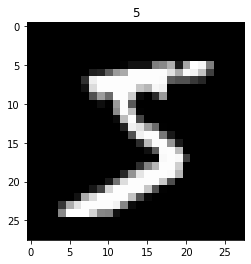

In [179]:
# In this pythorch version:  data = train_data ///    targets = train_labels

# plot one example
print(train_data.data.size())                               # (60000, 28, 28)
print(train_data.targets.size())                            # (60000)
plt.imshow(train_data.data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.targets[0])                     
plt.show()

In [174]:
# Data Loader for easy mini-batch return in training, the image batch shape will be 
#(50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [176]:
# convert test data into Variable, pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)  # Train=False because we want test data
test_x = Variable(torch.unsqueeze(test_data.data, dim=1)).type(torch.FloatTensor)[:2000]/255.   
# shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.targets[:2000]

In convolutional neural network architecture: 

 - the input image is converted to a feature set as set by 
         
         color times height and width of the image. 

Because of the dimensionality of the dataset, we cannot model it to
predict the output. 

The output layer in the preceding graph has classes such
as car, truck, van, and bicycle. The input bicycle image has features that the
CNN model should make use of and predict it correctly. 

**The convolution layer is always accompanied by the pooling layer**, which can be max pooling
and average pooling. The different layers of pooling and convolution
continue until the dimensionality is reduced to a level where we can use
fully connected simple neural networks to predict the correct classes.

In [184]:
# torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1,
#                 bias=True, padding_mode='zeros'

# to understand the stride and padding: 
# https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/

# stride: The amount by which the filter shifts is the stride
# padding: To preserve as much information about the original input volume 
class CNN(nn.Module):
    def __init__(self):                     # define the method __init__
        super(CNN, self).__init__()         # the super function that turns able use the objects
                                            # * first conv NN * )
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after con2d, 
                                            #padding=(kernel_size-1)/2 if stride=1           
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
                                            # * second conv NN *
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)# fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

In [185]:
cnn = CNN()
print(cnn)  # net architecture

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [186]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

In [192]:
from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('Please install sklearn for layer visualization, if not there')
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer');
    plt.show(); 
    #plt.pause(0.01)

Epoch:  0 | train loss: 0.0302 | test accuracy: 0.98


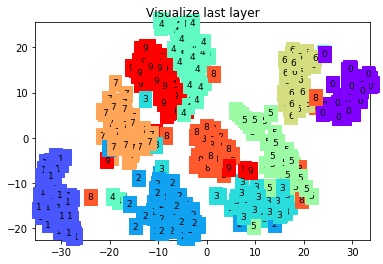

Epoch:  0 | train loss: 0.1495 | test accuracy: 0.98


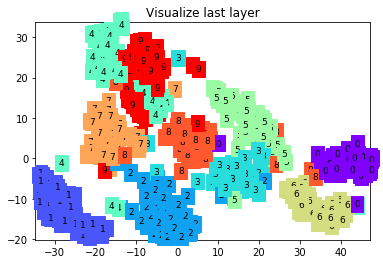

Epoch:  0 | train loss: 0.1025 | test accuracy: 0.98


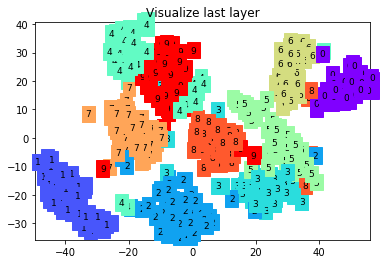

Epoch:  0 | train loss: 0.0192 | test accuracy: 0.98


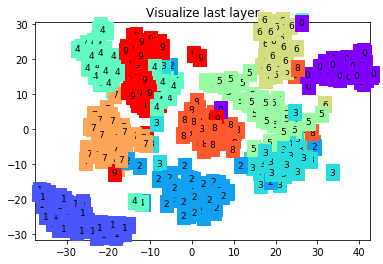

Epoch:  0 | train loss: 0.0046 | test accuracy: 0.98


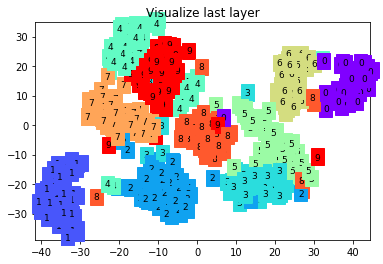

Epoch:  0 | train loss: 0.0211 | test accuracy: 0.98


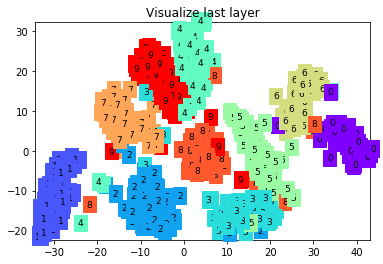

Epoch:  0 | train loss: 0.0468 | test accuracy: 0.98


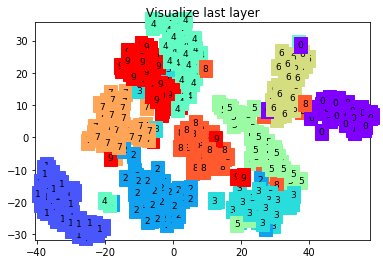

Epoch:  0 | train loss: 0.0041 | test accuracy: 0.98


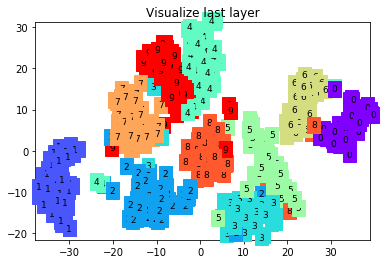

Epoch:  0 | train loss: 0.0023 | test accuracy: 0.98


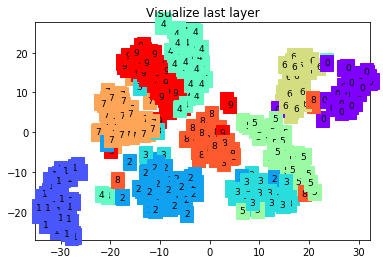

Epoch:  0 | train loss: 0.0010 | test accuracy: 0.98


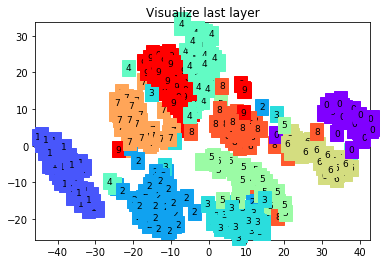

Epoch:  0 | train loss: 0.0150 | test accuracy: 0.98


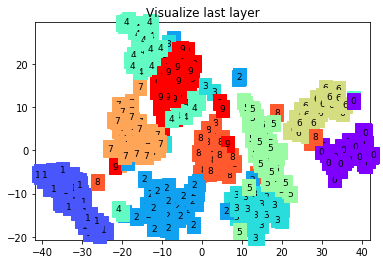

Epoch:  0 | train loss: 0.0762 | test accuracy: 0.98


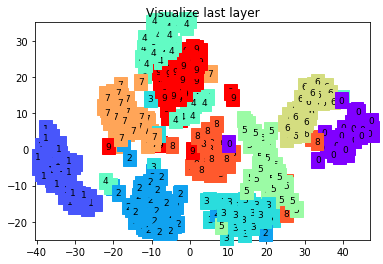

In [196]:
plt.ion()
# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   
        # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)
            if HAS_SK:
                # Visualization of trained flatten layer (T-SNE)
                tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                plot_only = 500
                low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                labels = test_y.numpy()[:plot_only]
                plot_with_labels(low_dim_embs, labels)
plt.ioff()

### Observation
In the previous graphs we can see that in the first step/epoch the number "4" is spread in the map, because the test accuracy was very low. The test accuracy increases at each step and in the last graph we can see the digits with similar numbers are placed together.

Next we can see the prediction made by the model

In [201]:
# print 10 predictions from test data
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


# Save and Reload

- How do we store and re-upload a model that has already been trained?

- Can we retrain the model with new inputs and store the model?

In the production environment, we typically cannot train and predict
at the same time because the training process takes a very long time.

The prediction services cannot be applied until the training process
using epoch is completed, the prediction services cannot be applied.

Disassociating the training process from the prediction process is required;
therefore, we need to store the application’s trained model and continue
until the next phase of training is done.

In [72]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)    # reproducible

In [73]:
#sample data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)

In [74]:
def save():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # plot result
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

    # 2 ways to save the net
    torch.save(net1, 'net.pkl')  # save entire net
    torch.save(net1.state_dict(), 'net_params.pkl')   # save only the parameters

In [75]:
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

In [76]:
def restore_params():
    # restore only the parameters in net1 to net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # copy net1's parameters into net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)

    # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

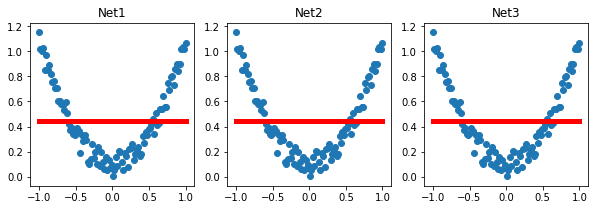

In [77]:
# save net1
save()
# restore entire net (may slow)
restore_net()
# restore only the net parameters
restore_params()

In [78]:
#RNN

In [79]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
torch.manual_seed(1)    # reproducible

In [81]:
# Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 64
TIME_STEP = 28          # rnn time step / image height
INPUT_SIZE = 28         # rnn input size / image width
LR = 0.01               # learning rate
DOWNLOAD_MNIST = True   # set to True if haven't download the data

In [82]:
# Mnist digital dataset
train_data = dsets.MNIST(
    root='./mnist/',
    train=True,                         # this is training data
    transform=transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                        # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,            # download it if you don't have it
)

torch.Size([60000, 28, 28])
torch.Size([60000])


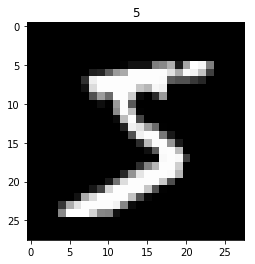

In [83]:
# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [84]:
# Data Loader for easy mini-batch return in training
train_loader = torch.utils.data.DataLoader(dataset=train_data, 
                                           batch_size=BATCH_SIZE, shuffle=True)

In [85]:
# convert test data into Variable, pick 2000 samples to speed up testing
test_data = dsets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor())
test_x = Variable(test_data.test_data, volatile=True).type(torch.FloatTensor)[:2000]/255.   
# shape (2000, 28, 28) value in range(0,1)
test_y = test_data.test_labels.numpy().squeeze()[:2000]    # covert to numpy array

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         # if use nn.RNN(), it hardly learns
            input_size=INPUT_SIZE,
            hidden_size=64,         # rnn hidden unit
            num_layers=1,           # number of rnn layer
            batch_first=True,       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )

        self.out = nn.Linear(64, 10)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out

In [87]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [88]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

In [89]:
# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):        # gives batch data
        b_x = Variable(x.view(-1, 28, 28))              # reshape x to (batch, time_step, input_size)
        b_y = Variable(y)                               # batch y

        output = rnn(b_x)                               # rnn output
        loss = loss_func(output, b_y)                   # cross entropy loss
        optimizer.zero_grad()                           # clear gradients for this training step
        loss.backward()                                 # backpropagation, compute gradients
        optimizer.step()                                # apply gradients

        if step % 50 == 0:
            test_output = rnn(test_x)                   # (samples, time_step, input_size)
            pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
            accuracy = sum(pred_y == test_y) / float(test_y.size)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data[0], '| test accuracy: %.2f' % accuracy)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch:  0 | train loss: 2.2883 | test accuracy: 0.10
Epoch:  0 | train loss: 0.8138 | test accuracy: 0.62
Epoch:  0 | train loss: 0.9010 | test accuracy: 0.78
Epoch:  0 | train loss: 0.6608 | test accuracy: 0.83
Epoch:  0 | train loss: 0.3150 | test accuracy: 0.85
Epoch:  0 | train loss: 0.2186 | test accuracy: 0.91
Epoch:  0 | train loss: 0.4511 | test accuracy: 0.90
Epoch:  0 | train loss: 0.4673 | test accuracy: 0.90
Epoch:  0 | train loss: 0.2014 | test accuracy: 0.93
Epoch:  0 | train loss: 0.2198 | test accuracy: 0.93
Epoch:  0 | train loss: 0.0439 | test accuracy: 0.93
Epoch:  0 | train loss: 0.1979 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0518 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1723 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1908 | test accuracy: 0.94
Epoch:  0 | train loss: 0.0576 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0414 | test accuracy: 0.96
Epoch:  0 | train loss: 0.3591 | test accuracy: 0.95
Epoch:  0 | train loss: 0.2465 | test accuracy

In [90]:
# print 10 predictions from test data
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


In [91]:
#RNN Regressor

In [92]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
torch.manual_seed(1)    # reproducible

In [94]:
# Hyper Parameters
TIME_STEP = 10      # rnn time step
INPUT_SIZE = 1      # rnn input size
LR = 0.02           # learning rate

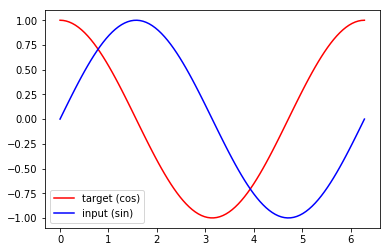

In [95]:
# show data
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)    # float32 for converting torch FloatTensor
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best')
plt.show()

In [96]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=32,     # rnn hidden unit
            num_layers=1,       # number of rnn layer
            batch_first=True,   # input & output will has batch size as 1s dimension. e.g. 
            #(batch, time_step, input_size)
        )
        self.out = nn.Linear(32, 1)

    def forward(self, x, h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, hidden_size)
        r_out, h_state = self.rnn(x, h_state)

        outs = []    # save all predictions
        for time_step in range(r_out.size(1)):    # calculate output for each time step
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

In [97]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [98]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.MSELoss()

In [99]:
h_state = None      # for initial hidden state

In [100]:
plt.figure(1, figsize=(12, 5))
plt.ion()           # continuously plot

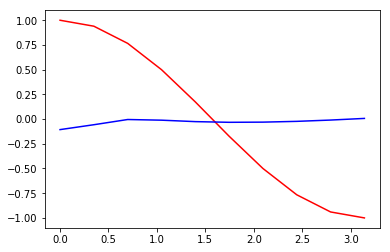

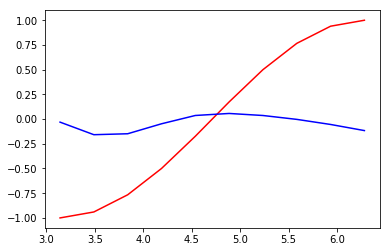

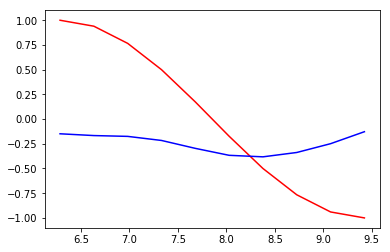

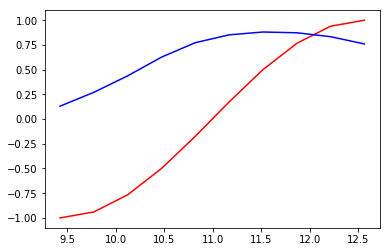

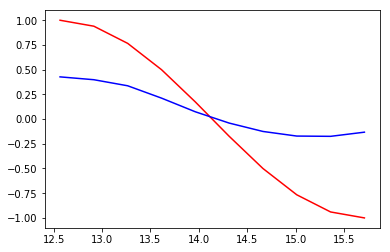

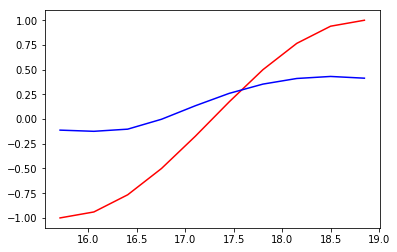

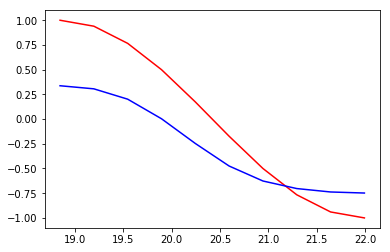

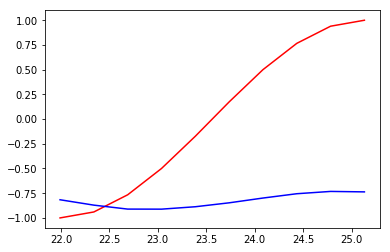

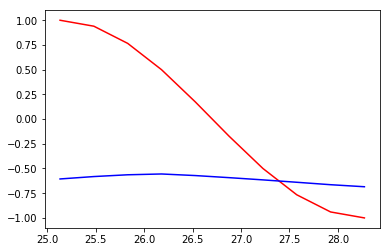

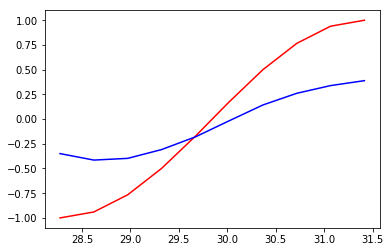

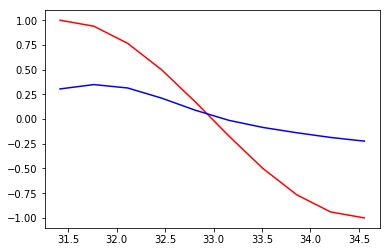

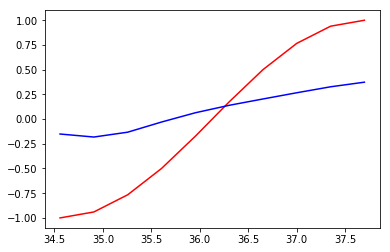

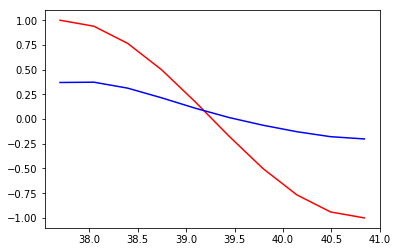

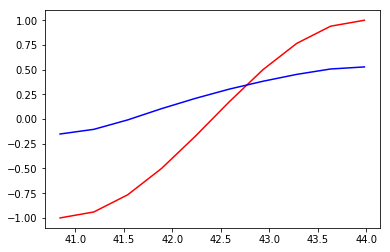

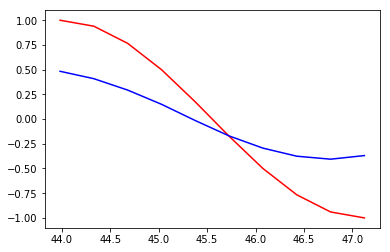

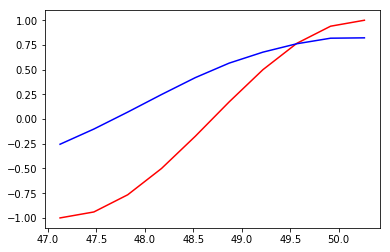

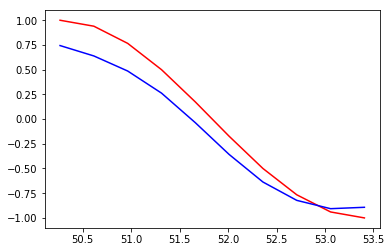

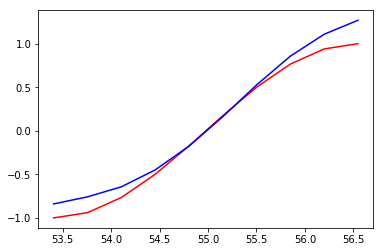

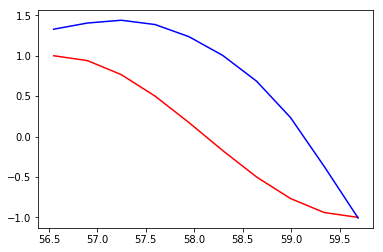

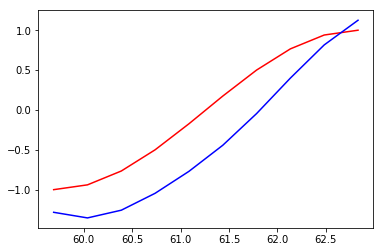

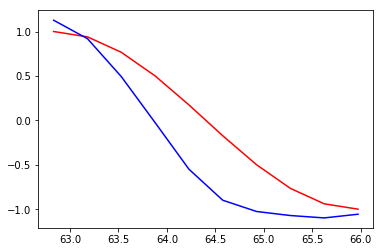

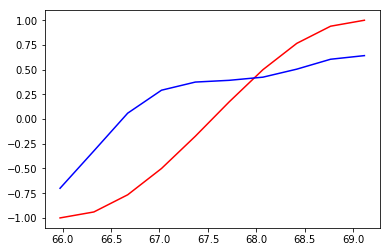

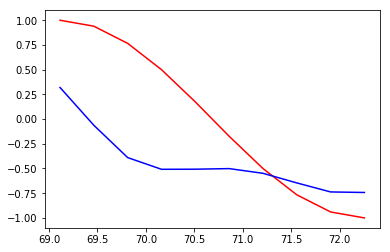

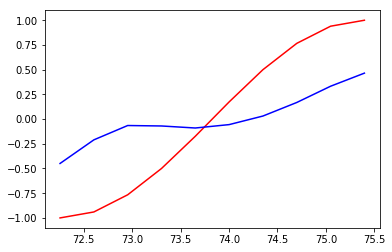

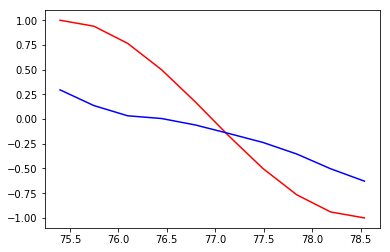

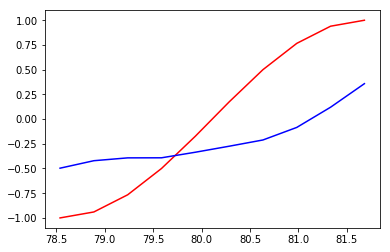

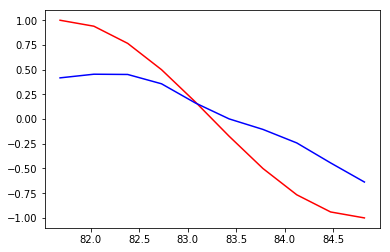

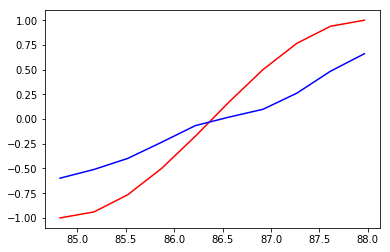

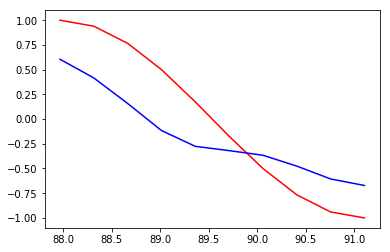

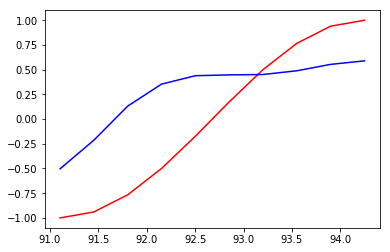

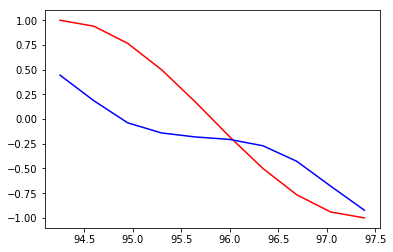

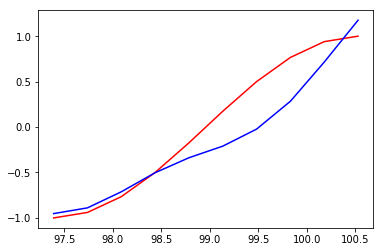

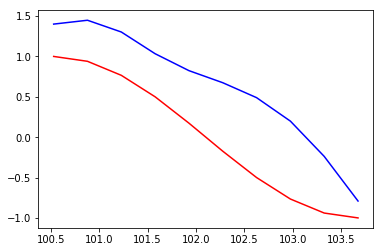

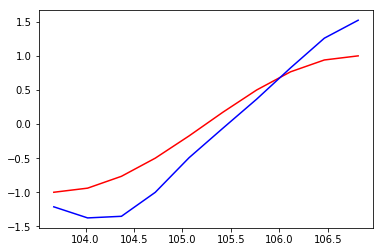

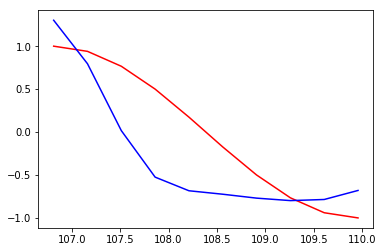

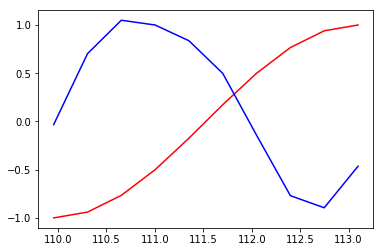

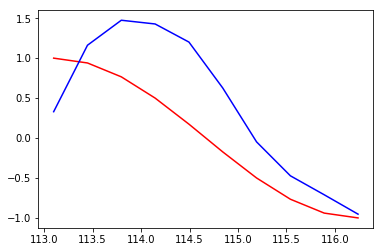

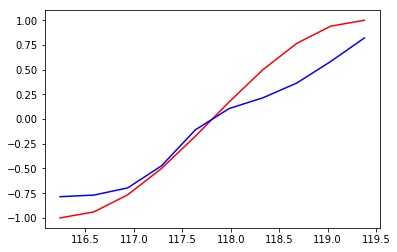

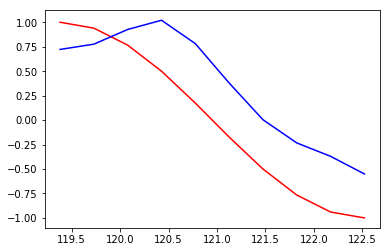

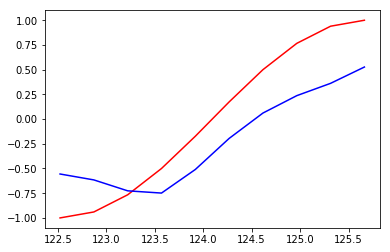

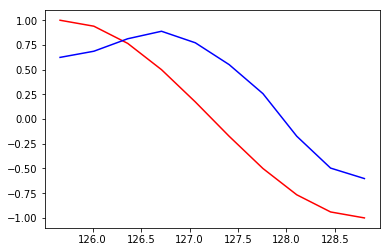

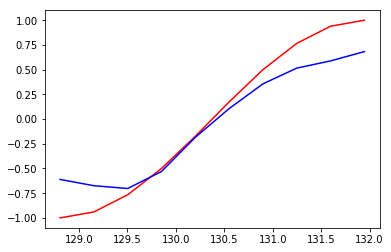

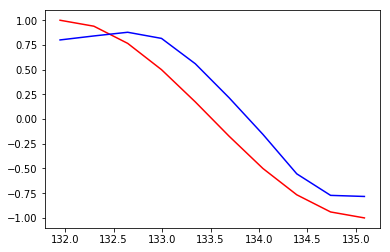

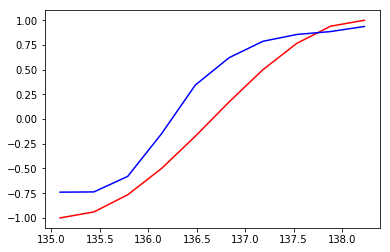

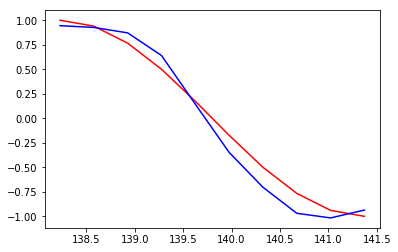

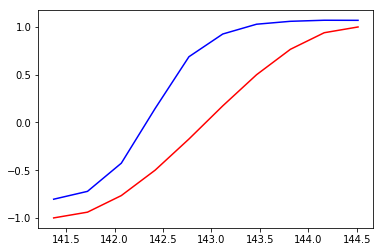

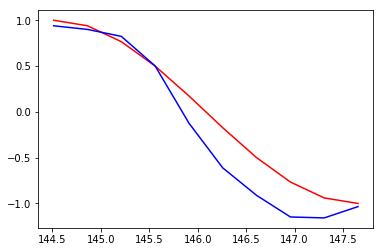

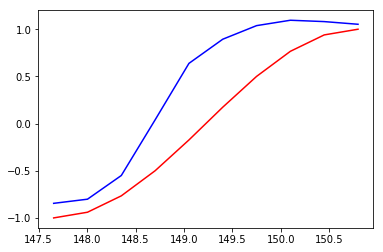

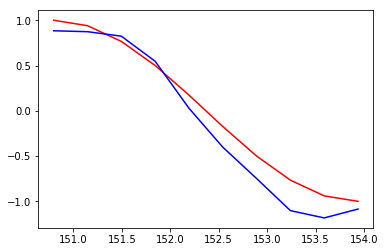

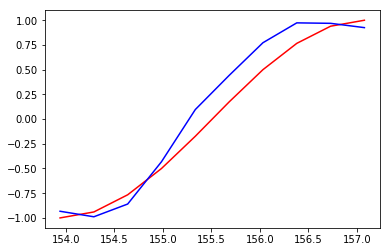

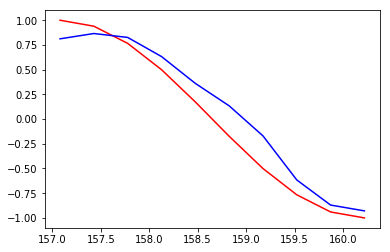

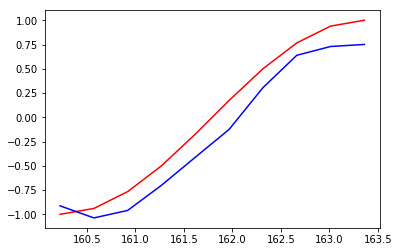

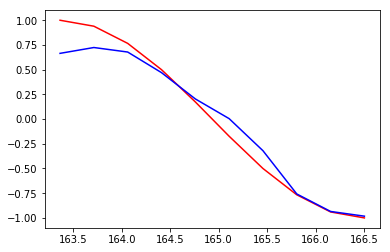

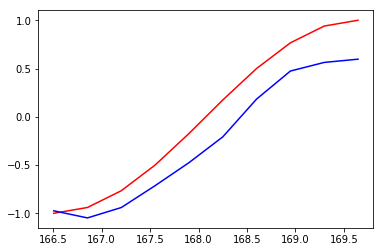

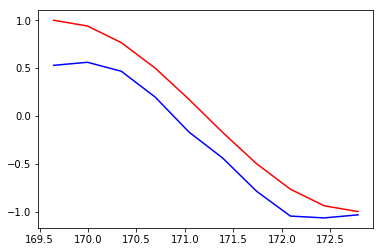

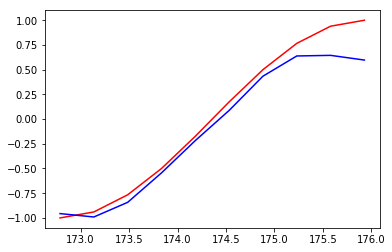

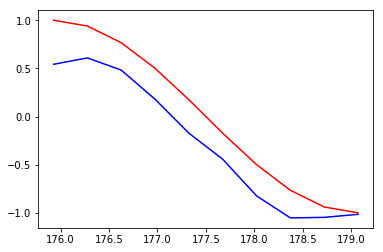

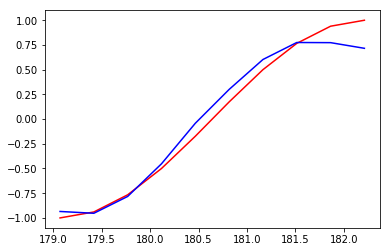

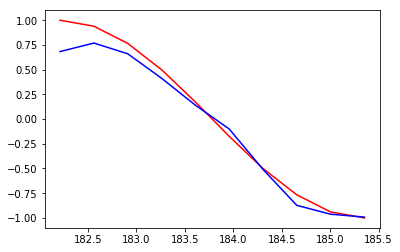

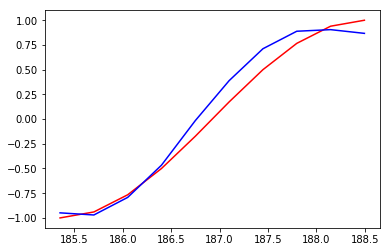

In [101]:
for step in range(60):
    start, end = step * np.pi, (step+1)*np.pi   # time range
    # use sin predicts cos
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
    x_np = np.sin(steps)    # float32 for converting torch FloatTensor
    y_np = np.cos(steps)

    x = Variable(torch.from_numpy(x_np[np.newaxis, :, np.newaxis]))    
    # shape (batch, time_step, input_size)
    y = Variable(torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))

    prediction, h_state = rnn(x, h_state)   # rnn output
    # !! next step is important !!
    h_state = Variable(h_state.data)        
    # repack the hidden state, break the connection from last iteration

    loss = loss_func(prediction, y)         # cross entropy loss
    optimizer.zero_grad()                   # clear gradients for this training step
    loss.backward()                         # backpropagation, compute gradients
    optimizer.step()                        # apply gradients

    # plotting
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)

In [102]:
#Autoencoder

In [103]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
%matplotlib inline

In [104]:
torch.manual_seed(1)    # reproducible

In [105]:
# Hyper Parameters
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005         # learning rate
DOWNLOAD_MNIST = False
N_TEST_IMG = 5

In [106]:
# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     
    # this is training data
    transform=torchvision.transforms.ToTensor(),    
    # Converts a PIL.Image or numpy.ndarray to
                                                    
    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,                        
    # download it if you don't have it
)

torch.Size([60000, 28, 28])
torch.Size([60000])


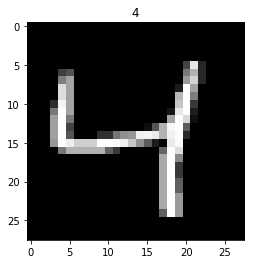

In [107]:
# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[2])
plt.show()

In [108]:
# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [109]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3),   # compress to 3 features which can be visualized in plt
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [110]:
autoencoder = AutoEncoder()
print(autoencoder)

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

# original data (first row) for viewing
view_data = Variable(train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): Tanh()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): Tanh()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)


Epoch:  0 | train loss: 0.2333


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  from ipykernel import kernelapp as app


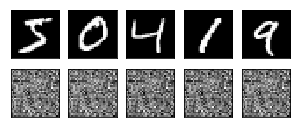

Epoch:  0 | train loss: 0.0612


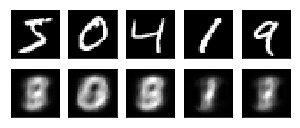

Epoch:  5 | train loss: 0.0383


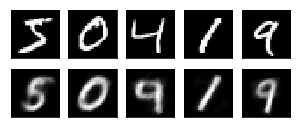

Epoch:  5 | train loss: 0.0399


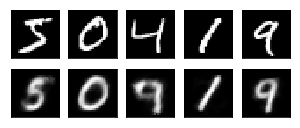

Epoch:  9 | train loss: 0.0387


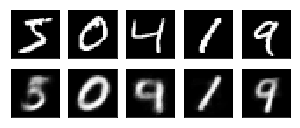

Epoch:  9 | train loss: 0.0382


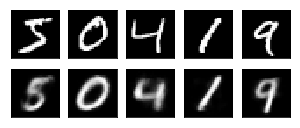

In [111]:
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x.view(-1, 28*28))   # batch x, shape (batch, 28*28)
        b_y = Variable(x.view(-1, 28*28))   # batch y, shape (batch, 28*28)
        b_label = Variable(y)               # batch label

        encoded, decoded = autoencoder(b_x)

        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients

        if step % 500 == 0 and epoch in [0, 5, EPOCH-1]:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data[0])

            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            
            # initialize figure
            f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
            
            for i in range(N_TEST_IMG):
                a[0][i].imshow(np.reshape(view_data.data.numpy()[i], 
                                          (28, 28)), cmap='gray'); 
                a[0][i].set_xticks(()); a[0][i].set_yticks(())
    
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], 
                                          (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.show(); #plt.pause(0.05)

In [112]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)    # reproducible

In [113]:
N_SAMPLES = 20
N_HIDDEN = 300

In [114]:
# training data
x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
y = x + 0.3*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))
x, y = Variable(x), Variable(y)


In [115]:
# test data
test_x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
test_y = test_x + 0.3*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))
test_x, test_y = Variable(test_x, volatile=True), Variable(test_y, volatile=True)


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  after removing the cwd from sys.path.


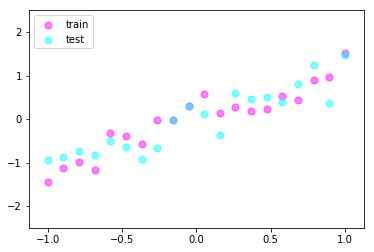

In [116]:
# show data
plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.5, label='train')
plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.5, label='test')
plt.legend(loc='upper left')
plt.ylim((-2.5, 2.5))
plt.show()

In [117]:
net_overfitting = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, 1),
)

In [118]:
net_dropped = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.Dropout(0.5),  # drop 50% of the neuron
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.Dropout(0.5),  # drop 50% of the neuron
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, 1),
)

In [119]:
print(net_overfitting)  # net architecture
print(net_dropped)

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): Dropout(p=0.5)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=300, bias=True)
  (4): Dropout(p=0.5)
  (5): ReLU()
  (6): Linear(in_features=300, out_features=1, bias=True)
)


In [120]:
optimizer_ofit = torch.optim.Adam(net_overfitting.parameters(), lr=0.01)
optimizer_drop = torch.optim.Adam(net_dropped.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


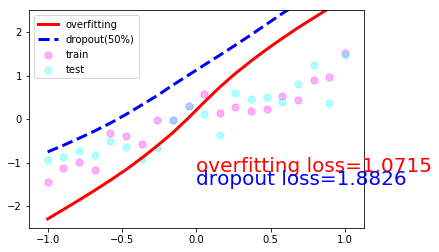

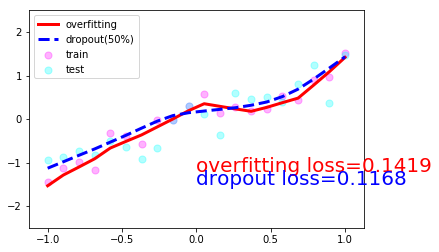

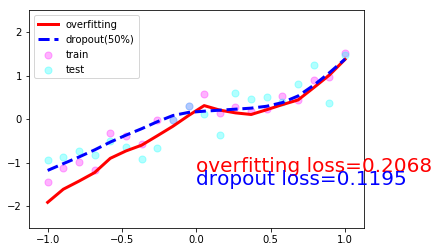

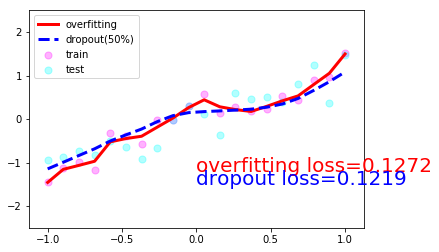

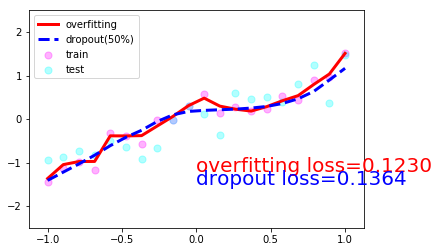

In [121]:
for t in range(500):
    pred_ofit = net_overfitting(x)
    pred_drop = net_dropped(x)
    loss_ofit = loss_func(pred_ofit, y)
    loss_drop = loss_func(pred_drop, y)

    optimizer_ofit.zero_grad()
    optimizer_drop.zero_grad()
    loss_ofit.backward()
    loss_drop.backward()
    optimizer_ofit.step()
    optimizer_drop.step()

    if t % 100 == 0:
        # change to eval mode in order to fix drop out effect
        net_overfitting.eval()
        net_dropped.eval()  # parameters for dropout differ from train mode

        # plotting
        plt.cla()
        test_pred_ofit = net_overfitting(test_x)
        test_pred_drop = net_dropped(test_x)
        plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, 
                    alpha=0.3, label='train')
        plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, 
                    alpha=0.3, label='test')
        plt.plot(test_x.data.numpy(), test_pred_ofit.data.numpy(), 'r-', 
                 lw=3, label='overfitting')
        plt.plot(test_x.data.numpy(), test_pred_drop.data.numpy(), 'b--', 
                 lw=3, label='dropout(50%)')
        plt.text(0, -1.2, 'overfitting loss=%.4f' % loss_func(test_pred_ofit, test_y).data[0], 
                 fontdict={'size': 20, 'color':  'red'})
        plt.text(0, -1.5, 'dropout loss=%.4f' % loss_func(test_pred_drop, test_y).data[0], 
                 fontdict={'size': 20, 'color': 'blue'})
        plt.legend(loc='upper left'); plt.ylim((-2.5, 2.5));plt.pause(0.1)

        # change back to train mode
        net_overfitting.train()
        net_dropped.train()
        plt.show()

In [122]:
#Initialize a random tensor

In [123]:
import numpy as np
from __future__ import print_function

In [124]:
import torch

In [125]:
torch.Tensor(5, 3)

tensor([[ 0.0000e+00,  8.5899e+09, -5.9241e+08],
        [-1.0845e-19,  5.6052e-45,  1.6255e-43],
        [ 4.4842e-44,  1.6255e-43,  1.5554e-43],
        [ 1.5975e-43,  1.3873e-43,  1.4574e-43],
        [ 1.4013e-45,  0.0000e+00, -5.9206e+08]])

In [126]:
#From a uniform distribution

In [127]:
torch.Tensor(5, 3).uniform_(-1, 1)

tensor([[ 0.8790,  0.7375,  0.1182],
        [ 0.3652,  0.1322,  0.8587],
        [ 0.3682, -0.2907,  0.0051],
        [ 0.0886, -0.7588, -0.5371],
        [ 0.0085,  0.0812, -0.6360]])

In [128]:
#getting the shape of the tensor

In [129]:
x = torch.Tensor(5, 3).uniform_(-1, 1)
print(x.size())

torch.Size([5, 3])


In [130]:
#Creation from lists & numpy

In [131]:
z = torch.LongTensor([[1, 3], [2, 9]])
print(z.type())
# Cast to numpy ndarray
print(z.numpy().dtype)

torch.LongTensor
int64


In [132]:
# Data type inferred from numpy
print(torch.from_numpy(np.random.rand(5, 3)).type())
print(torch.from_numpy(np.random.rand(5, 3).astype(np.float32)).type())

torch.DoubleTensor
torch.FloatTensor


In [133]:
#Simple mathematical operations

In [134]:
y = x * torch.randn(5, 3)
print(y)

tensor([[ 0.1587,  0.4137, -0.4801],
        [-0.2706,  0.0411, -0.8954],
        [ 0.3616, -0.0245, -0.3401],
        [-0.6478, -0.1207, -0.1698],
        [ 0.2107, -0.2128,  0.1017]])


In [135]:
y = x / torch.sqrt(torch.randn(5, 3) ** 2)
print(y)

tensor([[ 2.1697, -1.1561, -7.4875],
        [-0.5094,  0.4193, -4.4016],
        [ 0.4308,  0.0421,  0.6234],
        [ 2.3634,  2.1020, -0.2185],
        [ 4.8023,  0.4352,  0.4892]])


In [136]:
#Broadcasting

In [137]:
print (x.size())
y = x + torch.randn(5, 1)
print(y)

torch.Size([5, 3])
tensor([[ 1.0416, -0.1192, -0.1256],
        [ 0.0484,  1.5687,  0.0468],
        [ 0.1000, -0.4971,  0.3657],
        [ 0.3893,  0.5367, -0.2656],
        [ 2.1538,  1.9121,  2.0349]])


In [138]:
#Reshape

In [139]:
y = torch.randn(5, 10, 15)
print(y.size())
print(y.view(-1, 15).size())  # Same as doing y.view(50, 15)
print(y.view(-1, 15).unsqueeze(1).size()) # Adds a dimension at index 1.
print(y.view(-1, 15).unsqueeze(1).squeeze().size())
print()
print(y.transpose(0, 1).size())
print(y.transpose(1, 2).size())
print(y.transpose(0, 1).transpose(1, 2).size())
print(y.permute(1, 2, 0).size())

torch.Size([5, 10, 15])
torch.Size([50, 15])
torch.Size([50, 1, 15])
torch.Size([50, 15])

torch.Size([10, 5, 15])
torch.Size([5, 15, 10])
torch.Size([10, 15, 5])
torch.Size([10, 15, 5])


In [140]:
#Repeat

In [141]:
print(y.view(-1, 15).unsqueeze(1).expand(50, 100, 15).size())
print(y.view(-1, 15).unsqueeze(1).expand_as(torch.randn(50, 100, 15)).size())

torch.Size([50, 100, 15])
torch.Size([50, 100, 15])


In [142]:
#Concatenate tensors

In [143]:
# 2 is the dimension over which the tensors are concatenated
print(torch.cat([y, y], 2).size())
# stack concatenates the sequence of tensors along a new dimension.
print(torch.stack([y, y], 0).size())

torch.Size([5, 10, 30])
torch.Size([2, 5, 10, 15])


In [144]:
#Advanced Indexing

In [145]:
y = torch.randn(2, 3, 4)
print(y[[1, 0, 1, 1]].size())

# PyTorch doesn't support negative strides yet so ::-1 does not work.
rev_idx = torch.arange(1, -1, -1).long()
print(y[rev_idx].size())

torch.Size([4, 3, 4])
torch.Size([2, 3, 4])


In [146]:
#Convolution, BatchNorm & Pooling Layers

In [147]:
x = Variable(torch.randn(10, 3, 28, 28))

conv = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), stride=1, 
                 padding=1, bias=True)
bn = nn.BatchNorm2d(num_features=32)
pool = nn.MaxPool2d(kernel_size=(2, 2), stride=2)

output_conv = bn(conv(x))
outpout_pool = pool(conv(x))

print('Conv output size : ', output_conv.size())
print('Pool output size : ', outpout_pool.size())

Conv output size :  torch.Size([10, 32, 28, 28])
Pool output size :  torch.Size([10, 32, 14, 14])


In [148]:
#Recurrent, Embedding & Dropout Layers

In [149]:
inputs = [[1, 2, 3], [1, 0, 4], [1, 2, 4], [1, 4, 0], [1, 3, 3]]
x = Variable(torch.LongTensor(inputs))

embedding = nn.Embedding(num_embeddings=5, embedding_dim=20, padding_idx=1)
drop = nn.Dropout(p=0.5)
gru = nn.GRU(input_size=20, hidden_size=50, num_layers=2, batch_first=True, 
             bidirectional=True, dropout=0.3)

emb = drop(embedding(x))
gru_h, gru_h_t = gru(emb)

print('Embedding size : ', emb.size())
print('GRU hidden states size : ', gru_h.size())
print('GRU last hidden state size : ', gru_h_t.size())

Embedding size :  torch.Size([5, 3, 20])
GRU hidden states size :  torch.Size([5, 3, 100])
GRU last hidden state size :  torch.Size([4, 5, 50])


In [150]:
#The functional API provides users a way to use these classes in a functional way.

In [152]:
from torch.nn.functional import F
x = Variable(torch.randn(10, 3, 28, 28))
filters = Variable(torch.randn(32, 3, 3, 3))
conv_out = F.relu(F.dropout(F.conv2d(input=x, weight=filters, padding=1), 
                            p=0.5, training=True))

print('Conv output size : ', conv_out.size())

ImportError: cannot import name 'F'